### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## EasyVisa Project


## Problem Statement

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Importing necessary libraries

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

visa = pd.read_csv('/content/drive/My Drive/EasyVisa.csv') ##  Fill the blank to read the data
visa.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [ ]:
data.head() ##  Complete the code to view top 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail() ##  Complete the code to view last 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
data.case_status.value_counts(normalize=True)

Certified    0.667896
Denied       0.332104
Name: case_status, dtype: float64

### Understand the shape of the dataset

In [ ]:
data.shape ##  Complete the code to view dimensions of the data

(25480, 12)

### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
data.select_dtypes(include=np.object_).columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
# checking for duplicate values
data.duplicated().sum() ##  Complete the code to check duplicate entries in the data

0

## Exploratory Data Analysis

#### Let's check the statistical summary of the data

In [ ]:
data.describe(include='all') ##  Complete the code to print the statistical summary of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,25480,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,EZYV01,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,1,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,NaN,5667.043210,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,22877.928848,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-26.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


In [ ]:
data['full_time_position'].value_counts(normalize=True)

Y    0.89376
N    0.10624
Name: full_time_position, dtype: float64

In [ ]:
data['has_job_experience'].value_counts(normalize=True)

Y    0.580926
N    0.419074
Name: has_job_experience, dtype: float64

In [ ]:
data['requires_job_training'].value_counts(normalize=True)

N    0.884027
Y    0.115973
Name: requires_job_training, dtype: float64

In [ ]:
col_list = ['continent','education_of_employee','region_of_employment','unit_of_wage']

for i in col_list:
  print(data[i].value_counts())

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64


#### Fixing the negative values in number of employees columns

In [ ]:
data.loc[data['no_of_employees']<0] ## Complete the code to check negative values in the employee column

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

In [ ]:
# checking the number of unique values
data["case_id"].nunique()## Complete the code to check unique values in the mentioned column

25480

In [ ]:
data.shape[0]

25480

In [ ]:
data.drop('case_id', axis=1, inplace=True) ## Complete the code to drop 'case_id' column from the data

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on number of employees

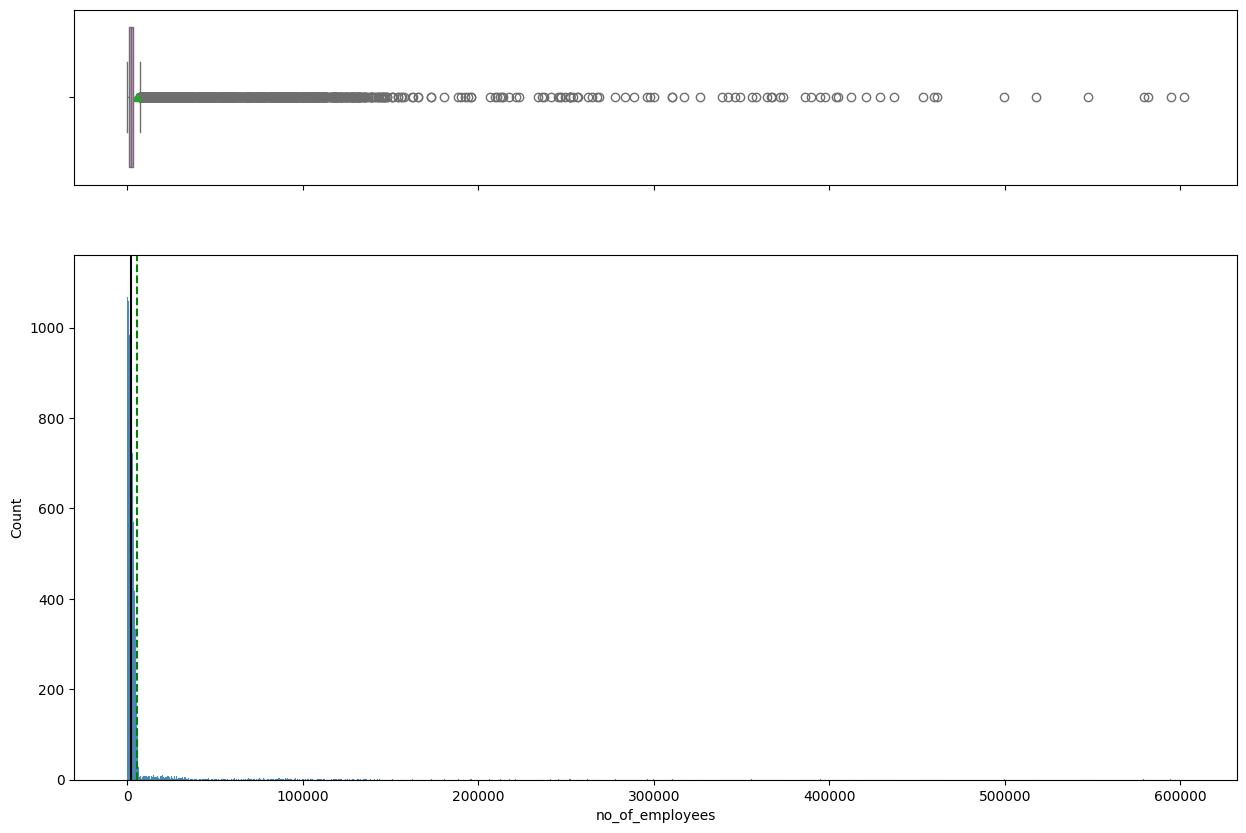

In [ ]:
histogram_boxplot(data, "no_of_employees")

#### Observations on prevailing wage

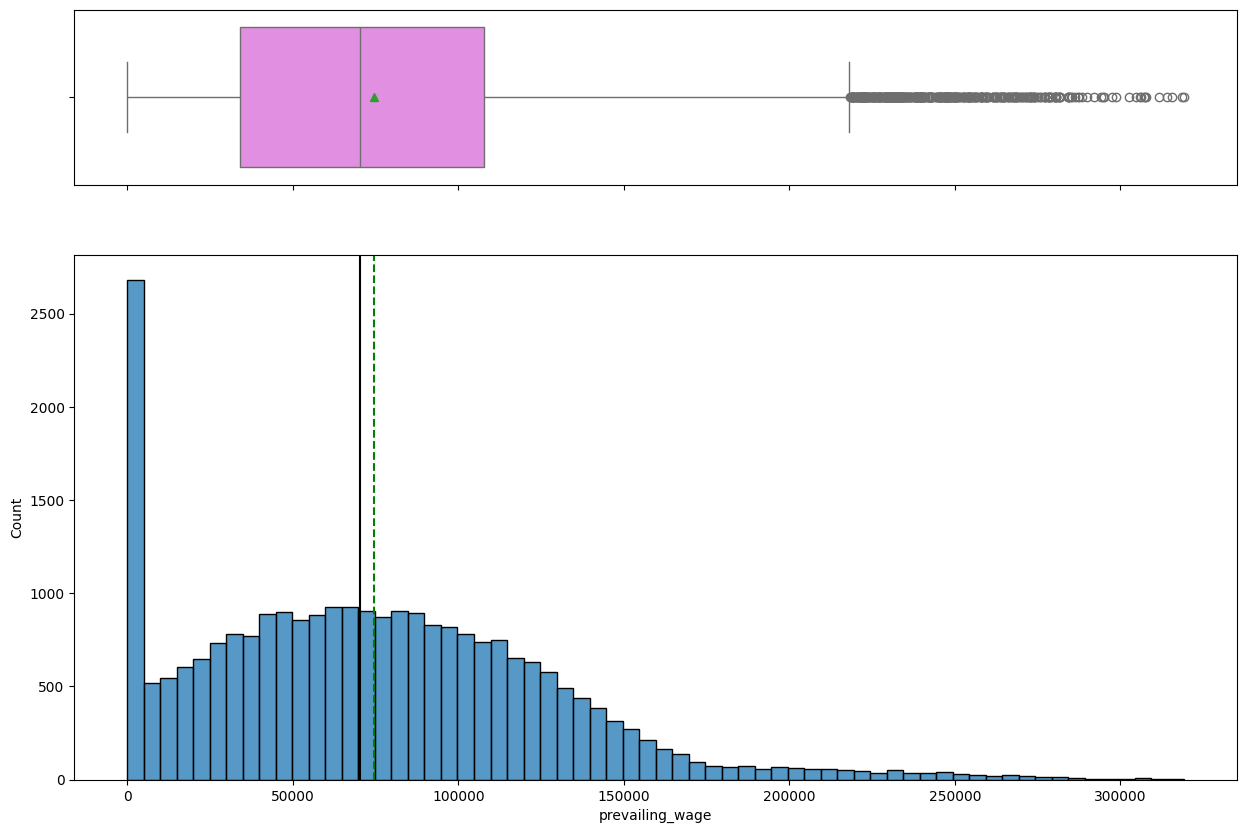

In [ ]:
histogram_boxplot(data,'prevailing_wage') ## Complete the code to create histogram_boxplot for prevailing wage

In [ ]:
# checking the observations which have less than 100 prevailing wage
data.loc[data['prevailing_wage']<100] ## Complete the code to find the rows with less than 100 prevailing wage

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,EZYV339,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,EZYV635,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,EZYV840,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,EZYV877,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,EZYV996,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25023,EZYV25024,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,EZYV25259,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,EZYV25309,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,EZYV25330,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [ ]:
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts() ## Complete the code to get the count of the values in the mentioned column

Hour    176
Name: unit_of_wage, dtype: int64

In [ ]:
data.loc[data["unit_of_wage"] == 'Hour','prevailing_wage'].value_counts()

Series([], Name: prevailing_wage, dtype: int64)

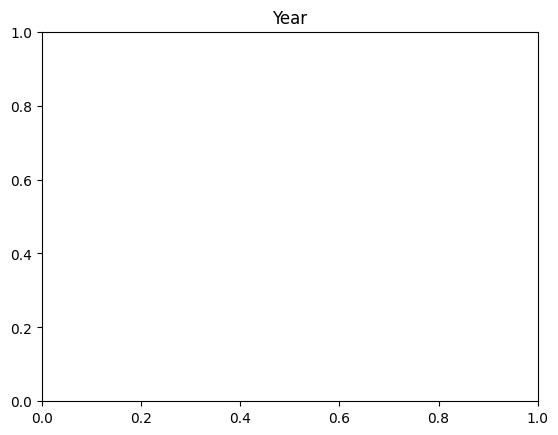

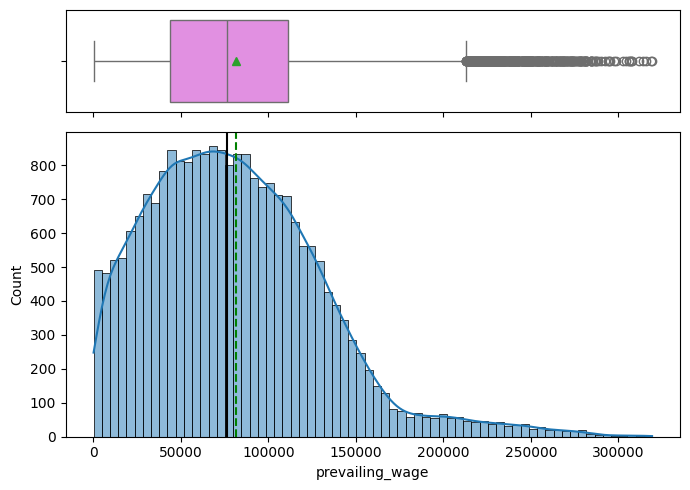

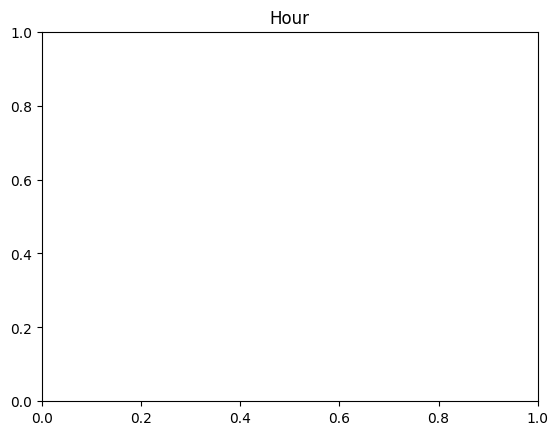

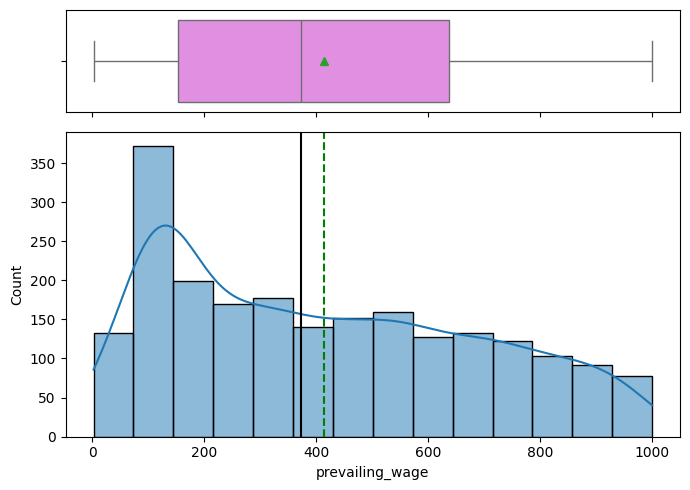

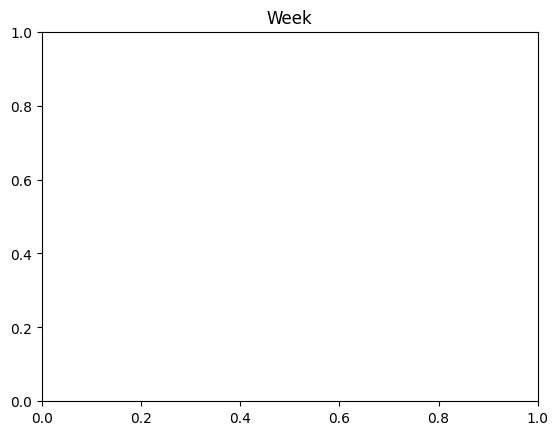

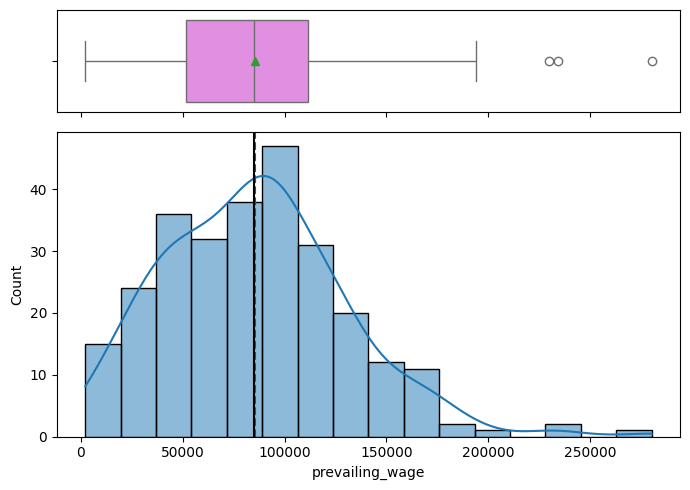

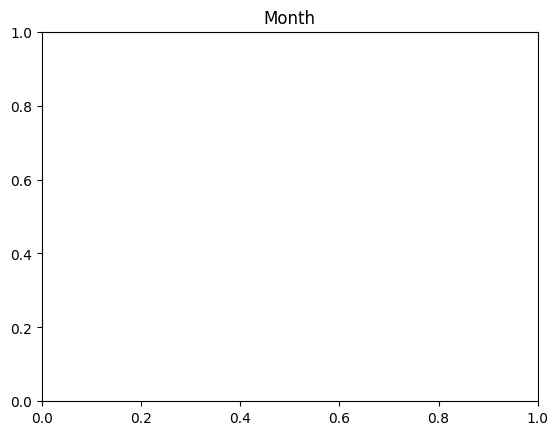

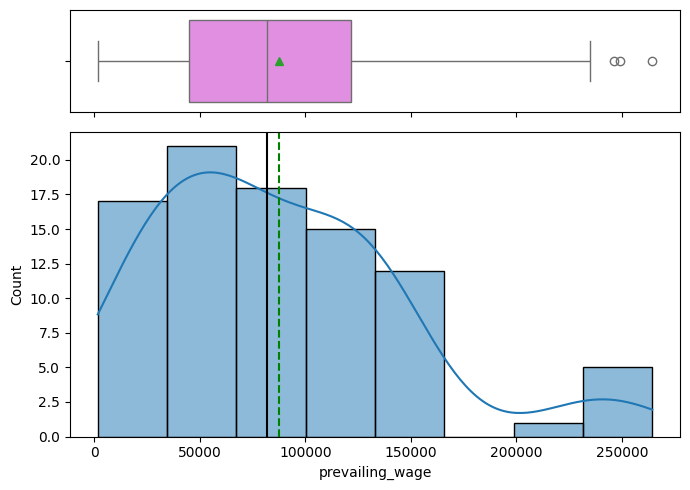

In [ ]:
col_list = ['Year','Hour','Week','Month']

for i,variable in enumerate(col_list):
  #plt.subplot(4,1,i+1)
  plt.title(variable)
  histogram_boxplot(data[data['unit_of_wage']==variable],'prevailing_wage',kde=True,figsize=(7,5))
  plt.tight_layout()
  plt.show()

In [ ]:
data[data['unit_of_wage']=='Week']['prevailing_wage'].sort_values(ascending=False)

11631    280175.95
7015     234406.36
942      229950.70
13818    193740.88
5985     191522.30
           ...    
21338      5167.76
7937       4879.34
19734      4229.43
9354       3271.19
7505       2183.23
Name: prevailing_wage, Length: 272, dtype: float64

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on continent

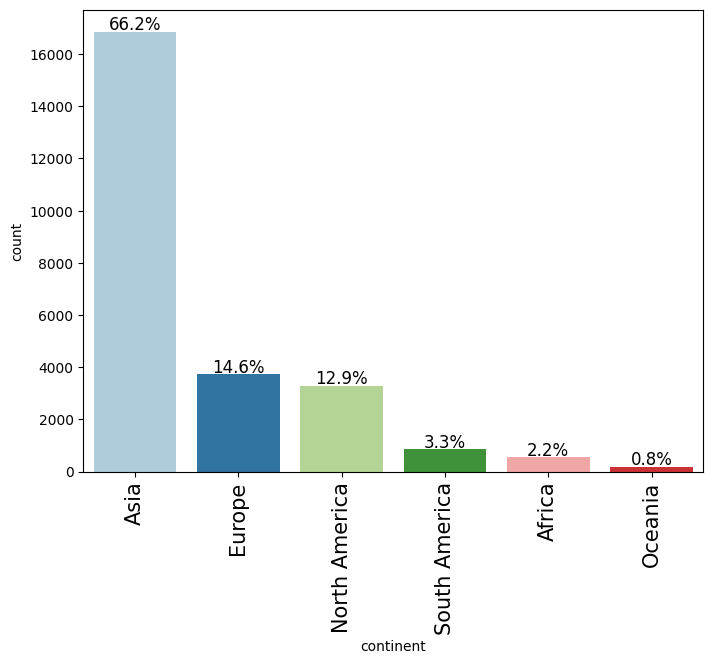

In [ ]:
labeled_barplot(data, "continent", perc=True)

#### Observations on education of employee

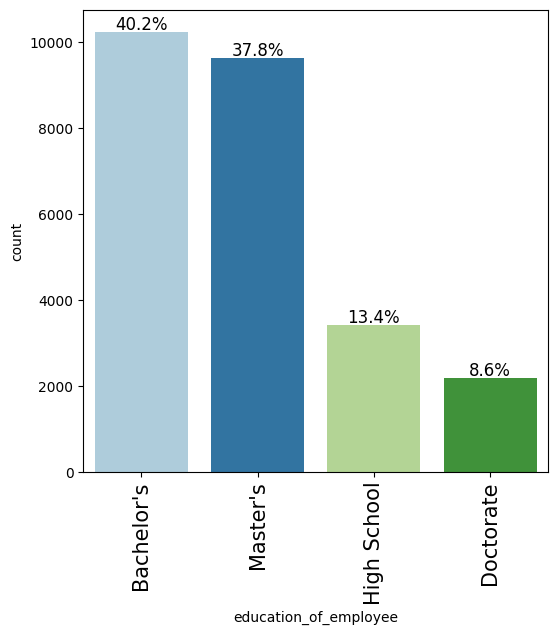

In [ ]:
labeled_barplot(data,'education_of_employee',perc=True)  ## Complete the code to create labeled_barplot for education of employee

In [ ]:
data.columns.to_list()

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'no_of_employees',
 'yr_of_estab',
 'region_of_employment',
 'prevailing_wage',
 'unit_of_wage',
 'full_time_position',
 'case_status']

#### Observations on job experience

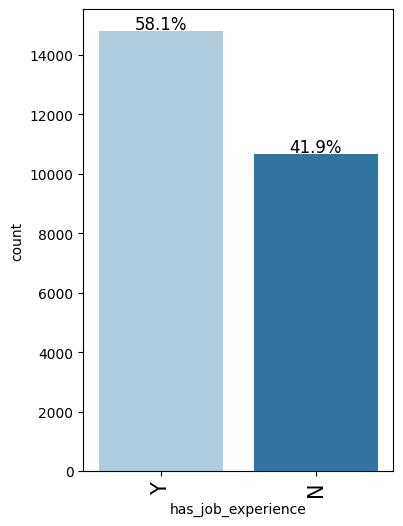

In [ ]:
labeled_barplot(data,'has_job_experience',perc=True)  ## Complete the code to create labeled_barplot for job experience

#### Observations on job training

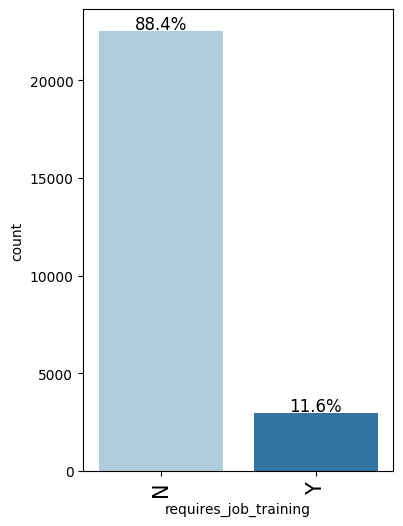

In [ ]:
labeled_barplot(data,'requires_job_training',perc=True)  ## Complete the code to create labeled_barplot for job training

#### Observations on region of employment

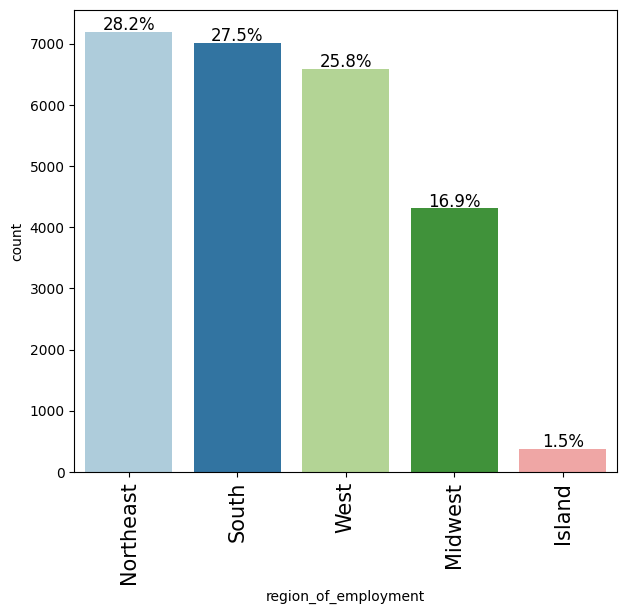

In [ ]:
labeled_barplot(data,'region_of_employment',perc=True)  ## Complete the code to create labeled_barplot for region of employment

#### Observations on unit of wage

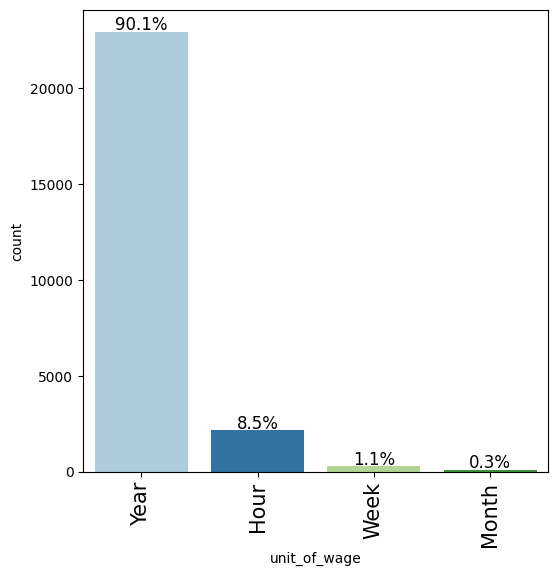

In [ ]:
labeled_barplot(data,'unit_of_wage',perc=True)  ## Complete the code to create labeled_barplot for unit of wage

#### Observations on case status

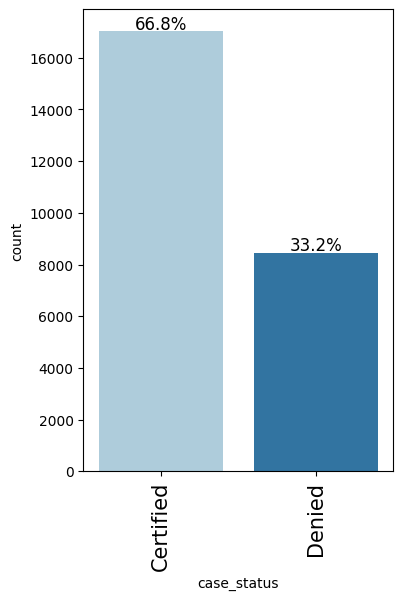

In [ ]:
labeled_barplot(data,'case_status',perc=True)  ## Complete the code to create labeled_barplot for case status

### Bivariate Analysis

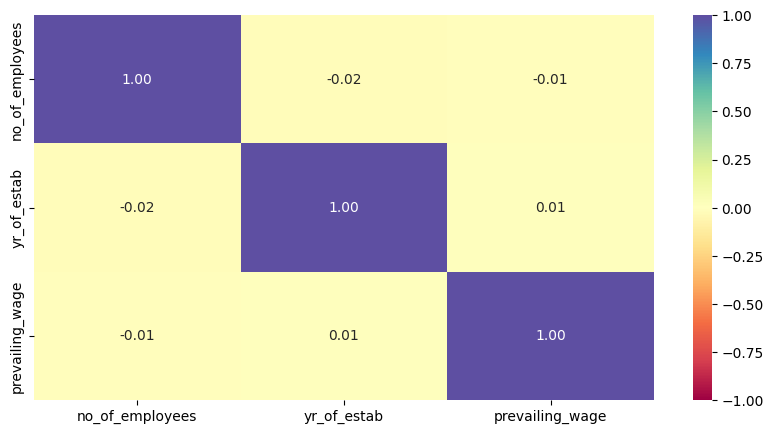

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) ## Complete the code to find the correlation between the variables
plt.show()

In [ ]:
#here is no strong relation inference form the heatmap.

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
def sb(data,predictor,target,norm_table):
  count = data[predictor].nunique()
  sorter = data[target].value_counts().index[-1]
  if norm_table==True:
    tab1 = pd.crosstab(data[predictor],data[target],margins=True,normalize='index').sort_values(by=sorter,ascending=False)
  else:
     tab1 = pd.crosstab(data[predictor],data[target],margins=True).sort_values(by=sorter,ascending=False)
  print(tab1)
  print('-'*120)
  tab = pd.crosstab(data[predictor],data[target],normalize='index').sort_values(by=sorter,ascending=False)
  tab.plot(kind='bar',stacked=True,figsize=(count+5,5))
  #plt.legend(loc='lower left',frameon=False)
  plt.legend(loc='upper left',bbox_to_anchor=(1,1))
  plt.show()


#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


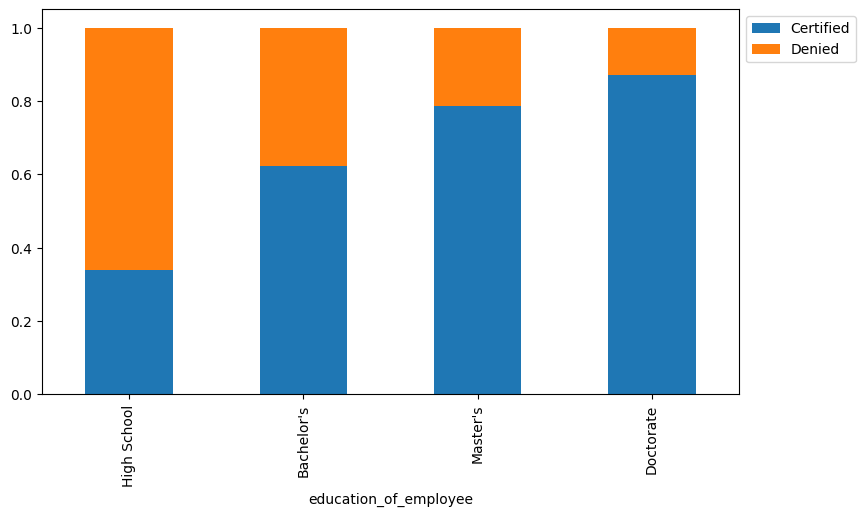

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


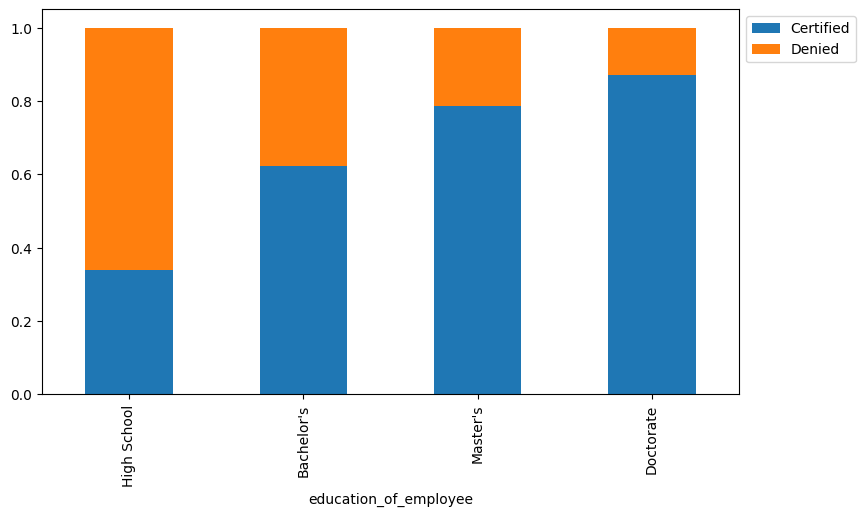

In [ ]:
sb(data, "education_of_employee", "case_status")

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

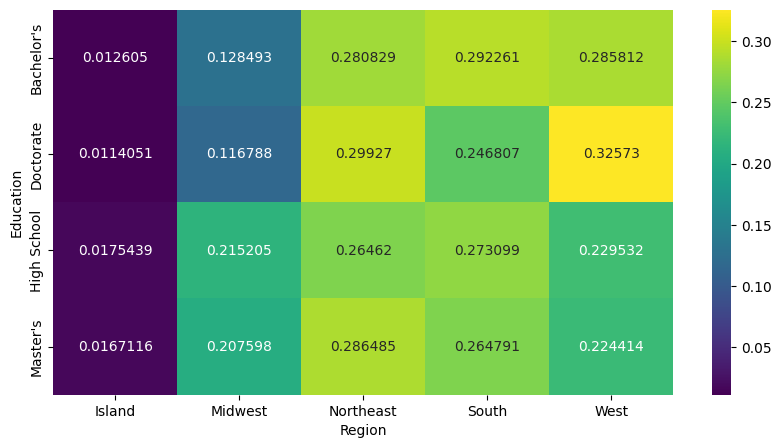

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['education_of_employee'],data['region_of_employment'],normalize='index'),
    annot=True,
    fmt="g",
    cmap="viridis"
) ## Complete the code to plot heatmap for the crosstab between education and region of employment

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

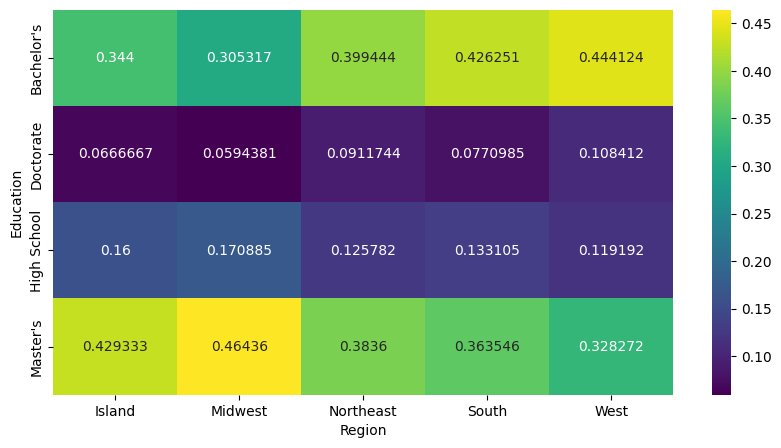

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['education_of_employee'],data['region_of_employment'],normalize='columns'),
    annot=True,
    fmt="g",
    cmap="viridis"
) ## Complete the code to plot heatmap for the crosstab between education and region of employment

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

#### Let's have a look at the percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


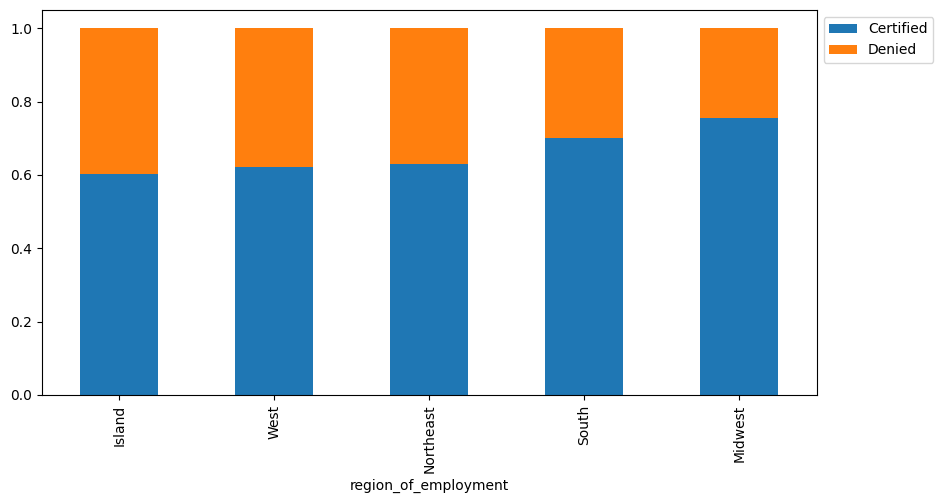

In [ ]:
sb(data,'region_of_employment','case_status') ## Complete the code to plot stacked barplot for region of employment and case status

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified    Denied
continent                         
South America   0.578638  0.421362
North America   0.618773  0.381227
Oceania         0.635417  0.364583
Asia            0.653105  0.346895
All             0.667896  0.332104
Africa          0.720508  0.279492
Europe          0.792337  0.207663
------------------------------------------------------------------------------------------------------------------------


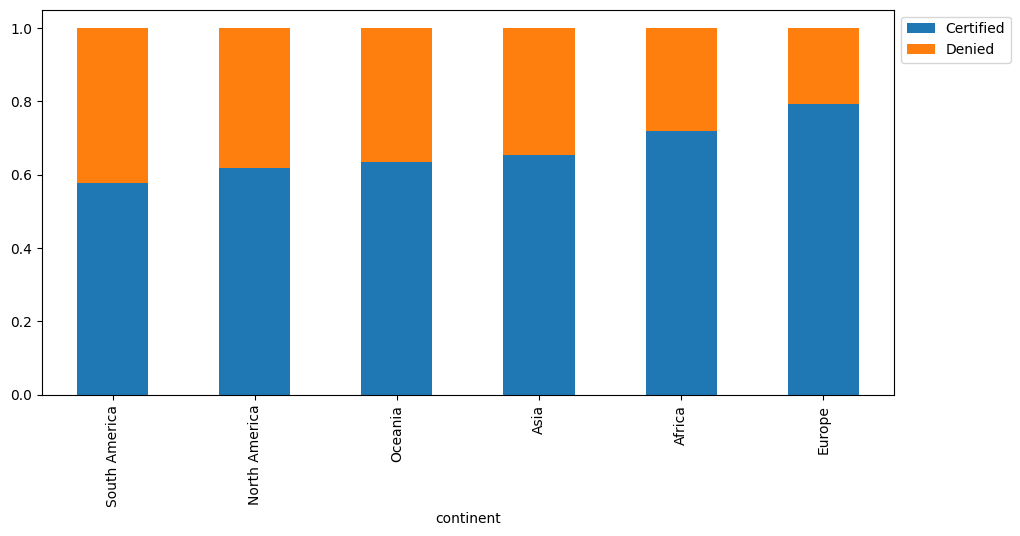

In [ ]:
sb(data,'continent','case_status',norm_table=True) ## Complete the code to plot stacked barplot for continent and case status

In [ ]:
data.columns.to_list()

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'no_of_employees',
 'yr_of_estab',
 'region_of_employment',
 'prevailing_wage',
 'unit_of_wage',
 'full_time_position',
 'case_status']

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified    Denied
has_job_experience                     
N                    0.561341  0.438659
All                  0.667896  0.332104
Y                    0.744764  0.255236
------------------------------------------------------------------------------------------------------------------------


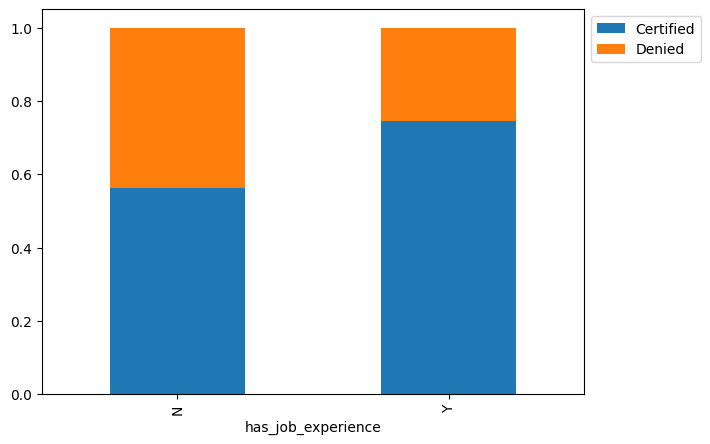

In [ ]:
sb(data,'has_job_experience','case_status',True) ## Complete the code to plot stacked barplot for job experience and case status

#### Do the employees who have prior work experience require any job training?

requires_job_training         N         Y
has_job_experience                       
N                      0.841731  0.158269
All                    0.884027  0.115973
Y                      0.914539  0.085461
------------------------------------------------------------------------------------------------------------------------


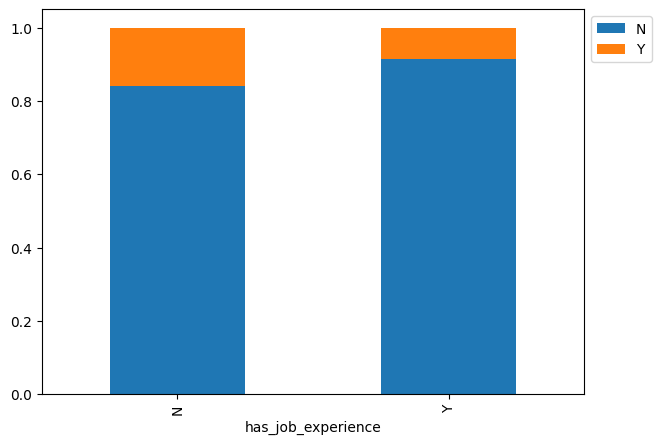

In [ ]:
sb(data,'has_job_experience','requires_job_training',True) ## Complete the code to plot stacked barplot for job experience and requires_job_training

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

In [ ]:
dy = data[data['unit_of_wage']=='Year']
dh = data[data['unit_of_wage']=='Hour']
dm = data[data['unit_of_wage']=='Month']
dw = data[data['unit_of_wage']=='Week']

In [ ]:
data['unit_of_wage'].value_counts(normalize=True)

Year     0.901177
Hour     0.084655
Week     0.010675
Month    0.003493
Name: unit_of_wage, dtype: float64

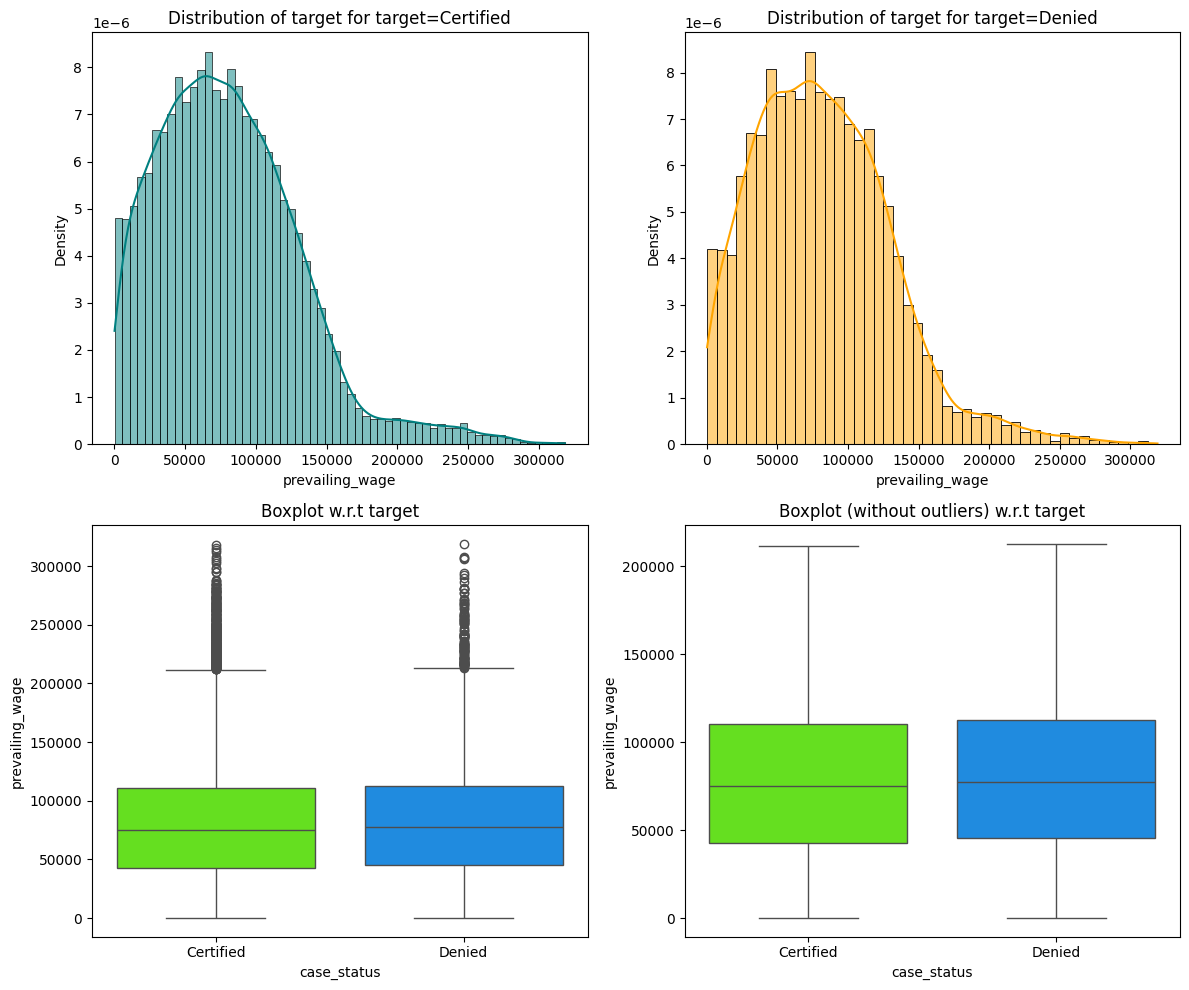

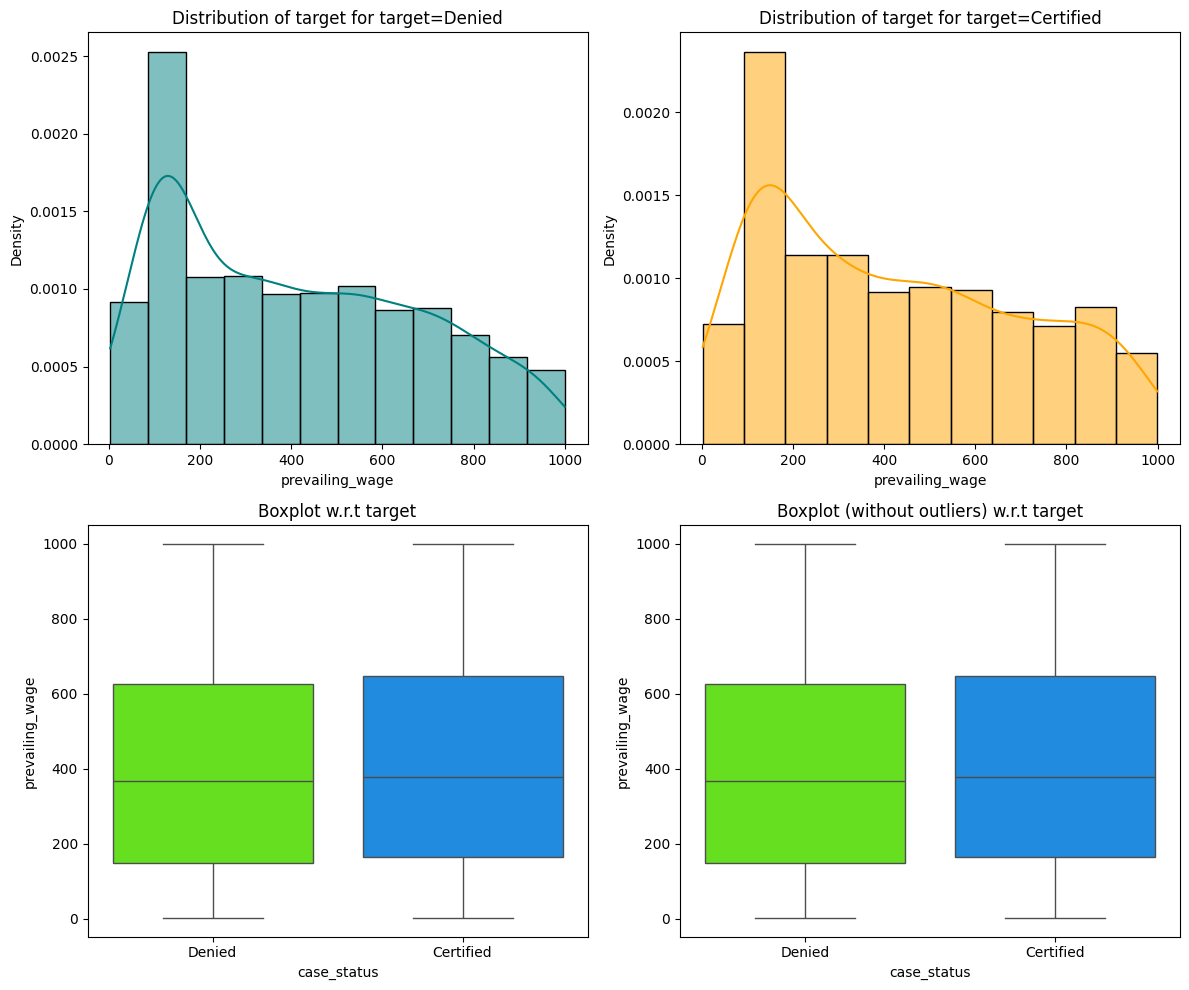

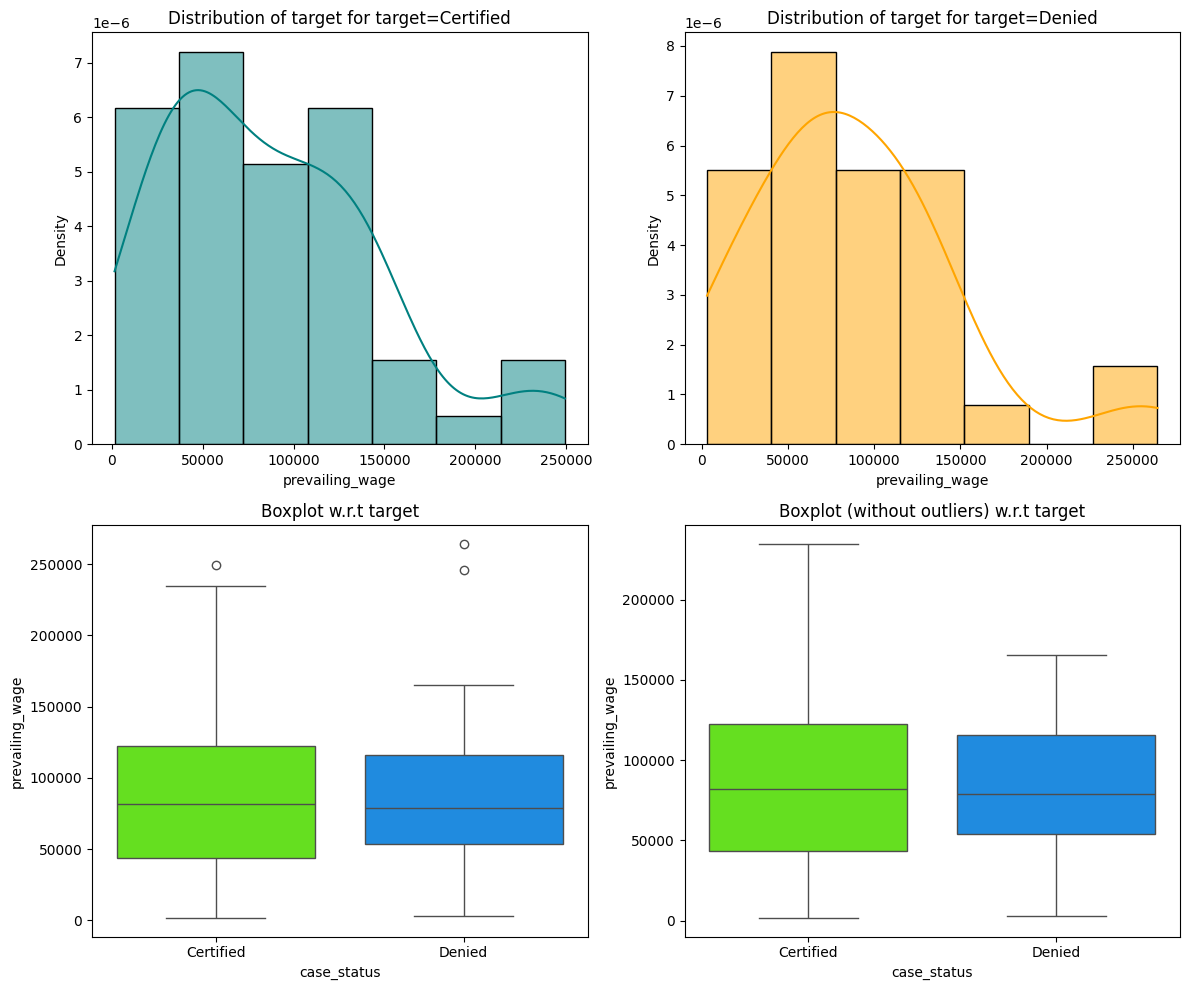

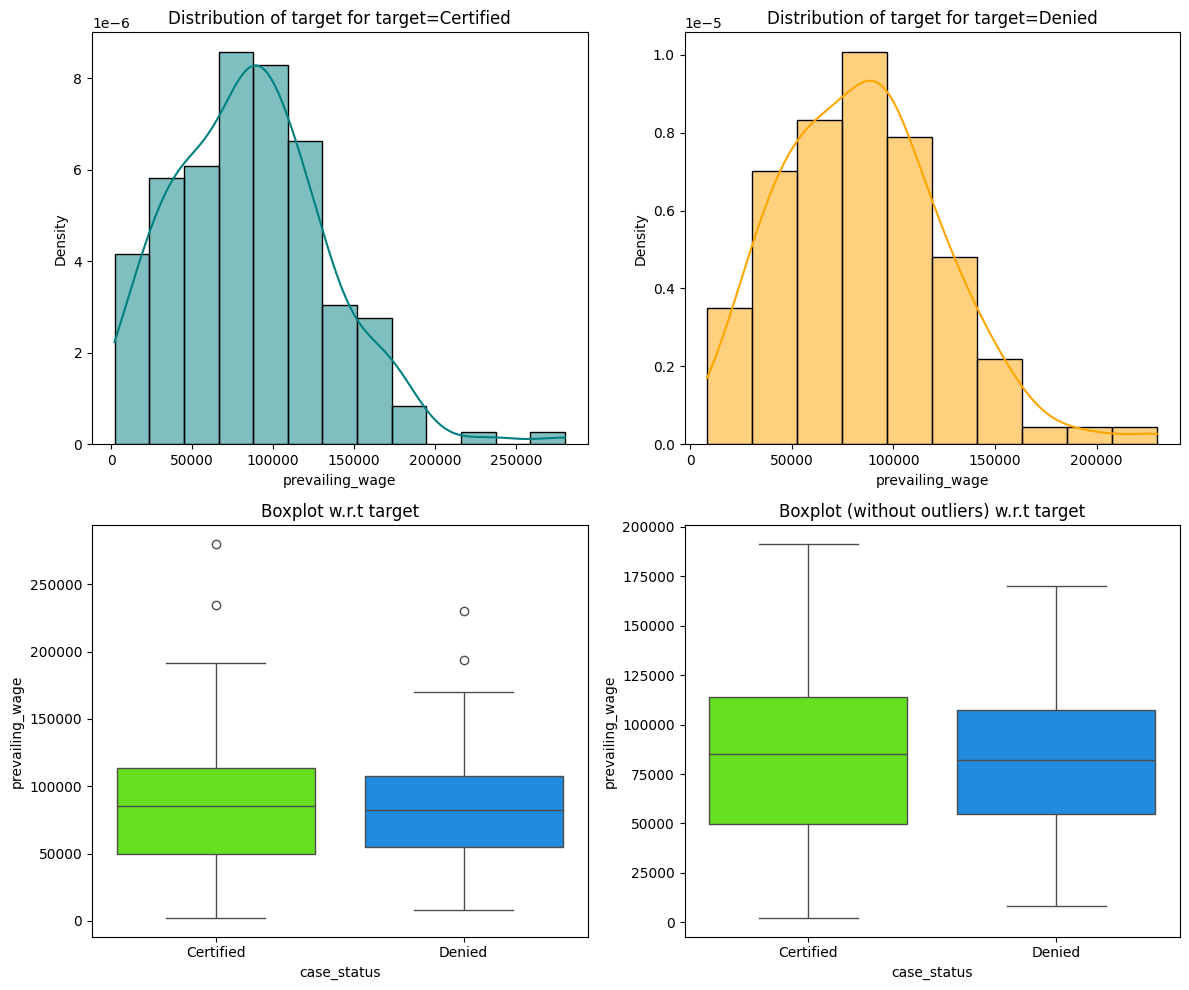

In [ ]:
dlist = [dy,dh,dm,dw]
for i in (dlist):
  distribution_plot_wrt_target(i,'prevailing_wage','case_status')
  ## Complete the code to find distribution of prevailing wage and case status

In [ ]:
dw

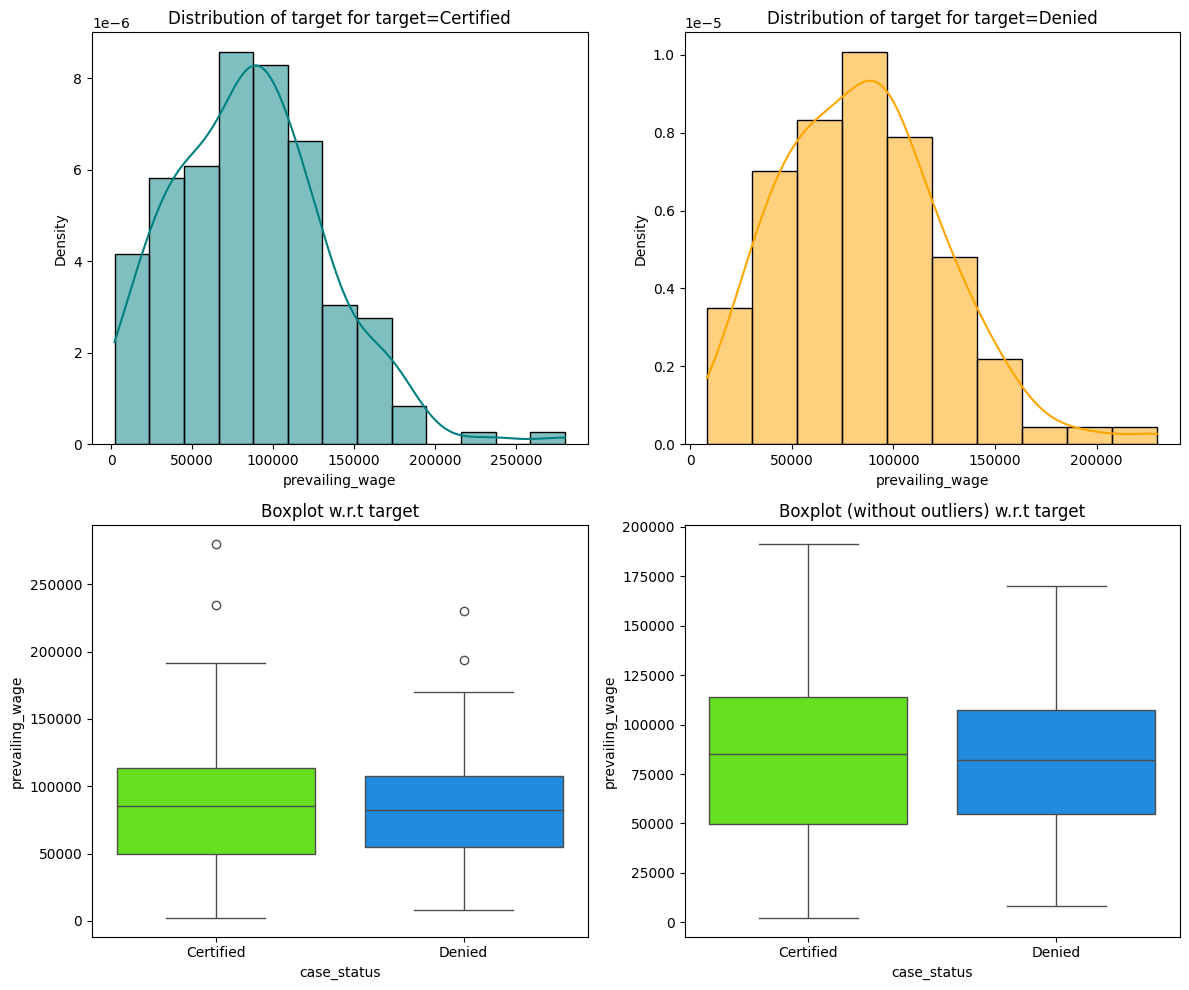

In [ ]:
distribution_plot_wrt_target(dw,'prevailing_wage','case_status')

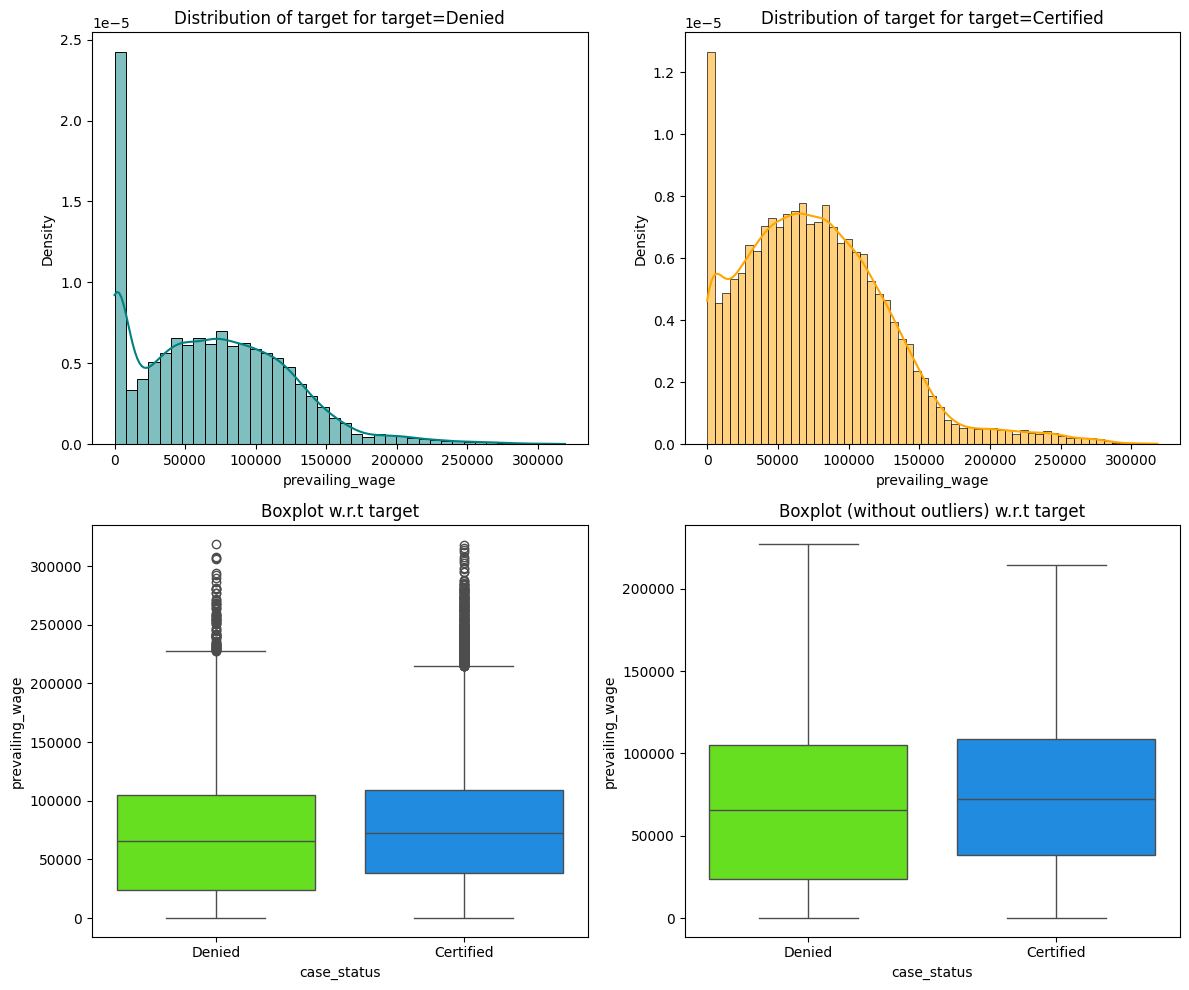

In [ ]:
distribution_plot_wrt_target(data,'prevailing_wage','case_status')

#### Checking if the prevailing wage is similar across all the regions of the US

<Figure size 1000x500 with 0 Axes>

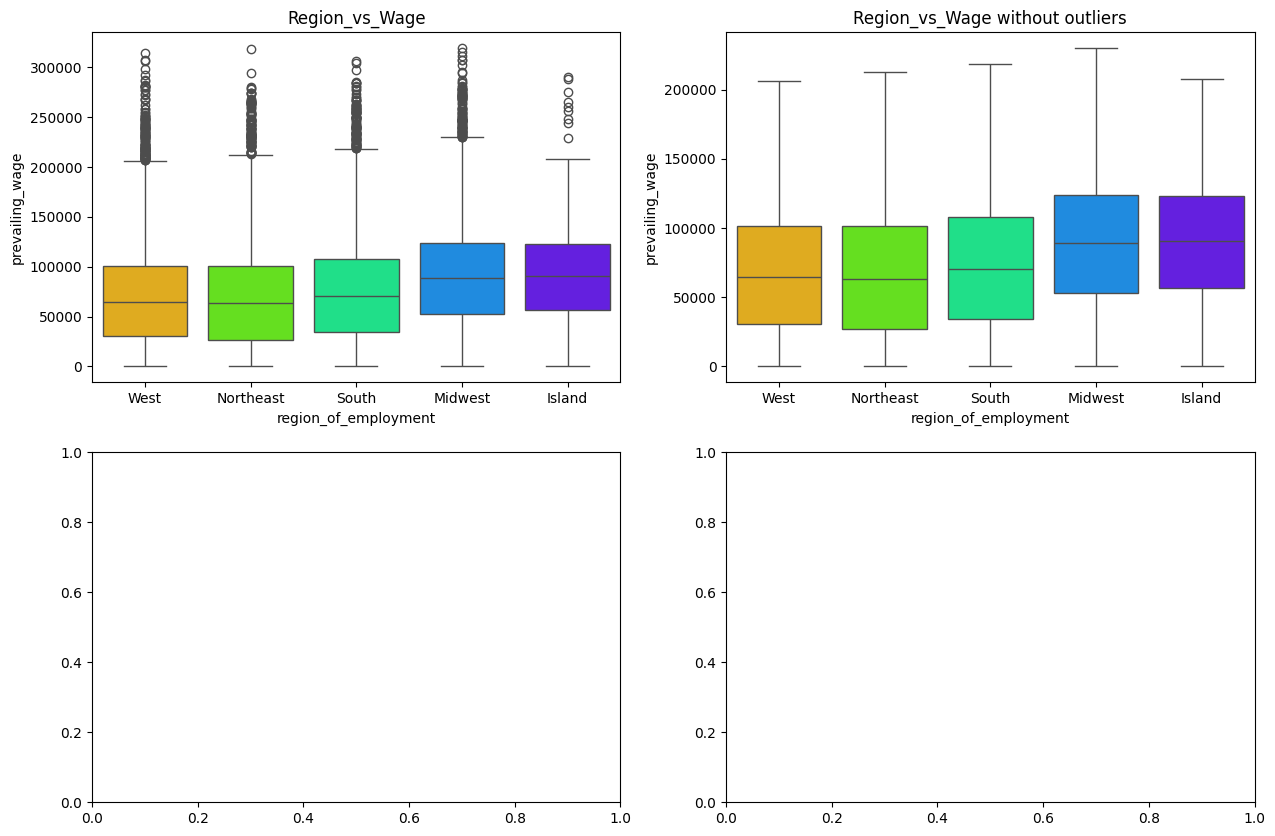

In [ ]:
plt.figure(figsize=(10, 5))
f,ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].set_title('Region_vs_Wage')
sns.boxplot(data,x='region_of_employment',y='prevailing_wage',ax=ax[0,0],palette='gist_rainbow')
ax[0,1].set_title('Region_vs_Wage without outliers')
sns.boxplot(data,x='region_of_employment',y='prevailing_wage',ax=ax[0,1],palette='gist_rainbow',showfliers=False)
 ## Complete the code to create boxplot for region of employment and prevailing wage
plt.show()

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified    Denied
unit_of_wage                     
Hour           0.346314  0.653686
Month          0.617978  0.382022
Week           0.621324  0.378676
All            0.667896  0.332104
Year           0.698850  0.301150
------------------------------------------------------------------------------------------------------------------------


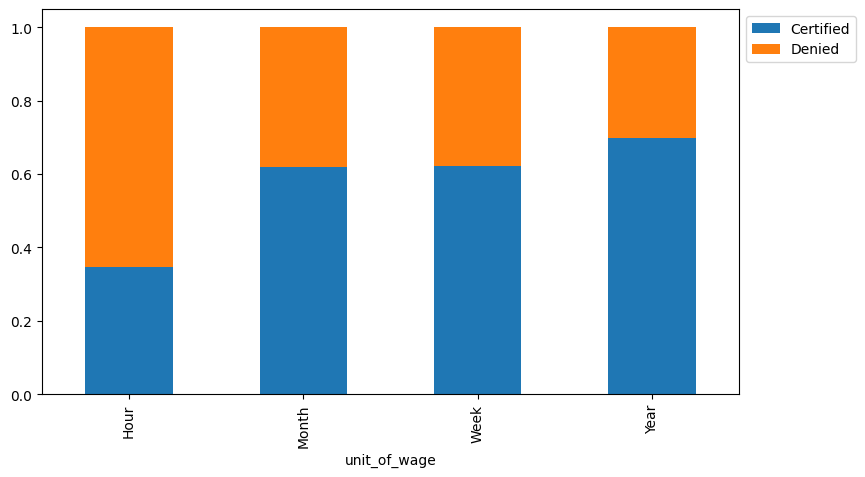

In [ ]:
sb(data,'unit_of_wage','case_status',True) ## Complete the code to plot stacked barplot for unit of wage and case status

In [ ]:
data.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

## Data Preprocessing

### Outlier Check

- Let's check for outliers in the data.

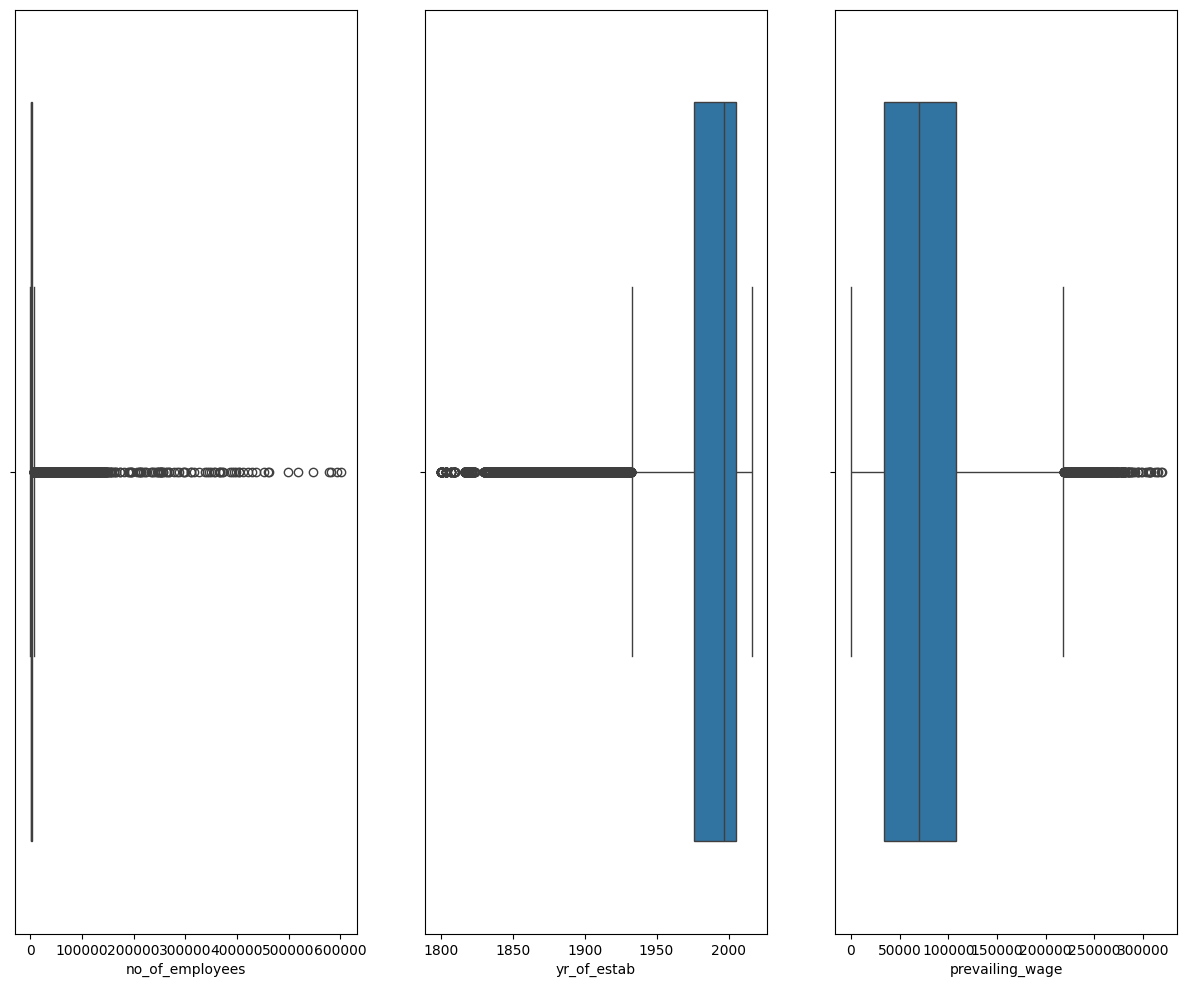

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
  plt.subplot(1,3,i+1)
  sns.boxplot(data,x=variable) ## Complete the code to create boxplots for all the numeric columns
plt.show()

In [ ]:
data.drop('range',axis=1)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,1
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,1
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,1
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,1


In [ ]:
sb(data,'no_of_employees','case_status',True)

case_status        0    1
no_of_employees          
5460             1.0  0.0
6417             1.0  0.0
684              1.0  0.0
7607             1.0  0.0
7592             1.0  0.0
...              ...  ...
5743             0.0  1.0
5744             0.0  1.0
5746             0.0  1.0
3685             0.0  1.0
1083             0.0  1.0

[7106 rows x 2 columns]
------------------------------------------------------------------------------------------------------------------------


ValueError: Image size of 711000x500 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 711000x500 with 1 Axes>

In [ ]:
data['no_of_employees'].value_counts()

183      18
854      16
724      16
766      15
1476     15
         ..
5876      1
5536      1
47866     1
4700      1
40224     1
Name: no_of_employees, Length: 7105, dtype: int64

In [ ]:
data['emp_range']=pd.cut(data['no_of_employees'],[0,100,1000,50000,100000,1000000],['least','min','avg','max','most'])

In [ ]:
data

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,emp_range
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0,"(1000, 50000]"
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1,"(1000, 50000]"
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0,"(1000, 50000]"
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0,"(0, 100]"
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1,"(1000, 50000]"
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,1,"(1000, 50000]"
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,1,"(1000, 50000]"
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,1,"(1000, 50000]"
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,1,"(1000, 50000]"


case_status               0         1
emp_range                            
(0, 100]           0.379859  0.620141
(100, 1000]        0.337974  0.662026
All                0.332104  0.667896
(1000, 50000]      0.329654  0.670346
(50000, 100000]    0.313531  0.686469
(100000, 1000000]  0.298893  0.701107
------------------------------------------------------------------------------------------------------------------------


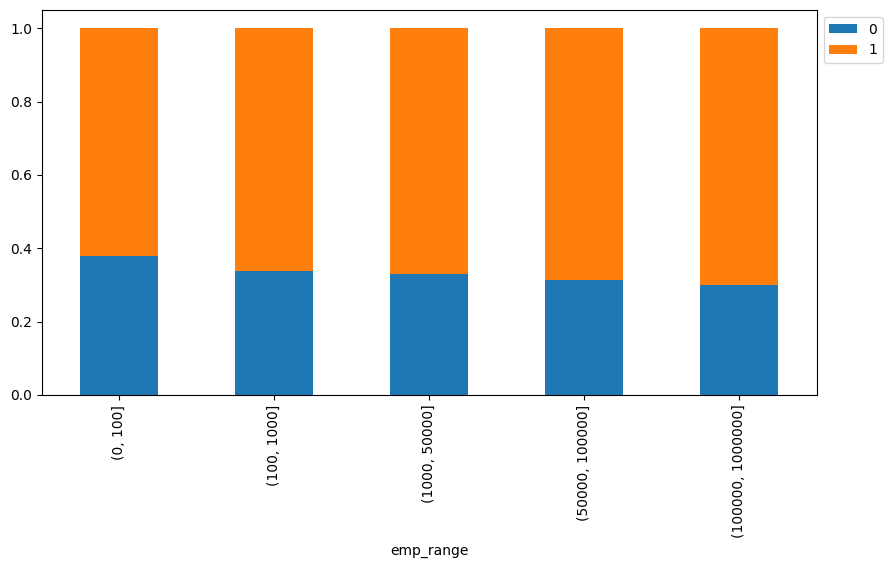

In [ ]:
sb(data,'emp_range','case_status',True)

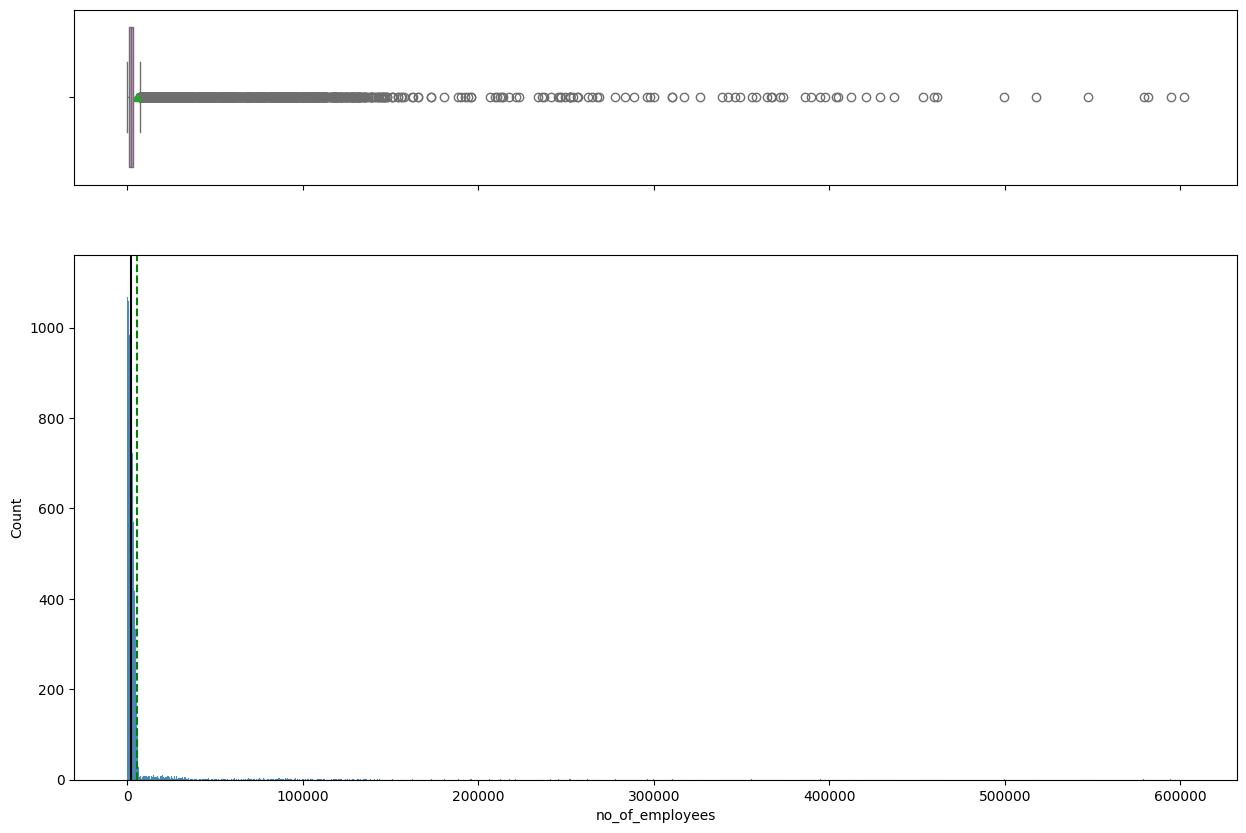

In [ ]:
histogram_boxplot(data,'no_of_employees')

In [ ]:
data.columns


Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
# taking the absolute values for number of employees
data["no_of_employees"] = np.absolute(data["no_of_employees"]) ## Write the function to convert the values to a positive number

In [ ]:
data['yr_since_establishment']=2016-data['yr_of_estab']

data.drop('yr_of_estab',axis=1,inplace=True)



In [ ]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)
data.drop('case_id',axis=1,inplace=True)

In [ ]:
data.drop('emp_range',axis=1,inplace=True)

KeyError: "['emp_range'] not found in axis"

In [ ]:
data.drop('range',axis=1,inplace=True)

In [ ]:
X = data.drop('case_status',axis=1) ## Complete the code to drop case status from the data
y = data["case_status"]


X = pd.get_dummies(X,columns=data.select_dtypes(include=np.object_).columns.to_list())  ## Complete the code to create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, stratify=y) ## Complete the code to split the data into train and test in the ratio 70:30

In [ ]:
X_train.head()

,no_of_employees,prevailing_wage,yr_since_establishment,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Bachelor's,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_N,has_job_experience_Y,requires_job_training_N,requires_job_training_Y,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_N,full_time_position_Y
19474,414,18546.12,12,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1
137,2847,77883.22,3,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1
3754,1429,139111.82,8,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1
4431,890,101561.38,38,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1
7707,2348,97817.75,19,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1


In [ ]:
X = sm.add_constant(X)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (19110, 28)
Shape of test set :  (6370, 28)
Percentage of classes in training set:
1    0.66787
0    0.33213
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667975
0    0.332025
Name: case_status, dtype: float64


## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn and threshold


def model_performance_classification_stats(model, predictors, target,threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)>threshold

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target,threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)>threshold
    cm = confusion_matrix(target, y_pred)
    df = pd.DataFrame(cm, index=[i for i in ['Actual_no','Actual_yes']],columns=[i for i in ['Predicted_no','Predicted_yes']])

    gnd_count = ["{0:0.0f}".format(item) for item in cm.flatten()]
    gnd_perc= ["{0:.2%}".format(item / cm.flatten().sum()) for item in cm.flatten()]
    labels = np.asarray(
        [f"{v1}\n{v2}" for v1,v2 in
         zip(gnd_count,gnd_perc)
        ]
    ).reshape(2, 2)
    plt.figure(figsize=(6, 4))
    sns.heatmap(df, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
def confusion_matrix_sklearn1(model, predictors, target,threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)>threshold
    cm = confusion_matrix(target, y_pred)
    df = pd.DataFrame(cm, index=[i for i in ['Actual_no','Actual_yes']],columns=[i for i in ['Predicted_no','Predicted_yes']])
    df=pd.DataFrame(cm)
    print(df)
    gnd_count = ["{0:0.0f}".format(item) for item in cm.flatten()]
    gnd_perc= ["{0:.2%}".format(item / cm.flatten().sum()) for item in cm.flatten()]
    labels = [f"{v1}\n{v2}" for v1,v2 in
              zip(gnd_count,gnd_perc)]
    np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(6, 4))
    sns.heatmap(df, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
def feature_importance_barc(model):
  importances = model.feature_importances_
  feature = X_train.columns
  indices = np.argsort(importances)

  plt.figure(figsize=(12,10))
  plt.barh(range(len(indices)),importances[indices],align='center',color='violet')
  plt.ylabel(range(len(indices)),features[indices])
  plt.show()


# Logistic Regression

In [ ]:
log_model = sm.Logit(y_train,X_train.astype(float))
log_rs = log_model.fit()

print(log_rs.summary())

Optimization terminated successfully.
         Current function value: 0.529231
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:            case_status   No. Observations:                19110
Model:                          Logit   Df Residuals:                    19088
Method:                           MLE   Df Model:                           21
Date:                Tue, 20 Feb 2024   Pseudo R-squ.:                  0.1675
Time:                        01:47:11   Log-Likelihood:                -10114.
converged:                       True   LL-Null:                       -12148.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
no_of_employees                   -5.229e-07   7.51e-07     -

In [ ]:
lg_train=model_performance_classification_stats(log_rs,X_train,y_train)

,Accuracy,Recall,Precision,F1
0,0.741549,0.881298,0.76663,0.819974


In [ ]:
lg_test=model_performance_classification_stats(log_rs,X_test,y_test)
lg_test

,Accuracy,Recall,Precision,F1
0,0.731554,0.880846,0.757019,0.814252


In [ ]:
#Remvoing VIF values

vif_df = pd.DataFrame()
vif_df['Features'] = X_train.columns

vif_df['Values'] = [variance_inflation_factor(X_train.values,i)
                    for i in range(X_train.columns.size)]
vif_df


,Features,Values
0,no_of_employees,1.003092
1,prevailing_wage,1.329141
2,yr_since_establishment,1.004941
3,continent_Africa,inf
4,continent_Asia,inf
5,continent_Europe,inf
6,continent_North America,inf
7,continent_Oceania,inf
8,continent_South America,inf
9,education_of_employee_Bachelor's,inf


In [ ]:
dlist = X_train.select_dtypes(include=np.uint8).columns
for i in dlist:
  X_train[i]= X_train[i].astype(float)

In [ ]:
lg_params = (np.exp(log_rs.params)-1)*100
lg_params

df = pd.DataFrame({'Odds':log_rs.params,'Log_of_odds':lg_params},index=X_train.columns).sort_values(by='Log_of_odds',ascending=False)
df

,Odds,Log_of_odds
education_of_employee_Doctorate,1.211438e+00,235.831103
education_of_employee_Master's,6.642946e-01,94.311926
continent_Europe,6.448660e-01,90.573173
region_of_employment_Midwest,5.939807e-01,81.118393
has_job_experience_Y,5.318107e-01,70.201140
unit_of_wage_Year,4.901888e-01,63.262447
region_of_employment_South,3.173855e-01,37.353190
unit_of_wage_Month,2.532061e-01,28.814870
full_time_position_Y,1.513746e-01,16.343235
requires_job_training_Y,1.245906e-01,13.268467


## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [ ]:
model = DecisionTreeClassifier(random_state=1) ## Complete the code to define decision tree classifier with random state = 1
model.fit(X_train,y_train) ## Complete the code to fit decision tree classifier on the train data

#### Checking model performance on training set

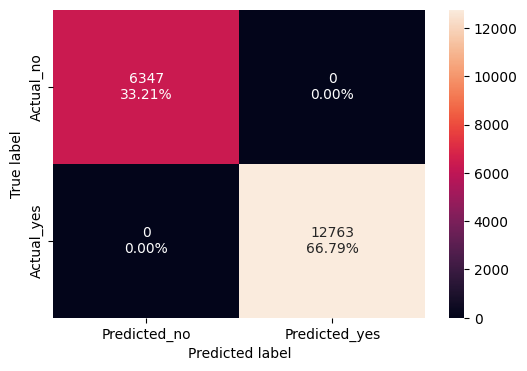

In [ ]:
confusion_matrix_sklearn(model,X_train,y_train) ## Complete the code to create confusion matrix for train data

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(model,X_train,y_train) ## Complete the code to check performance on train data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

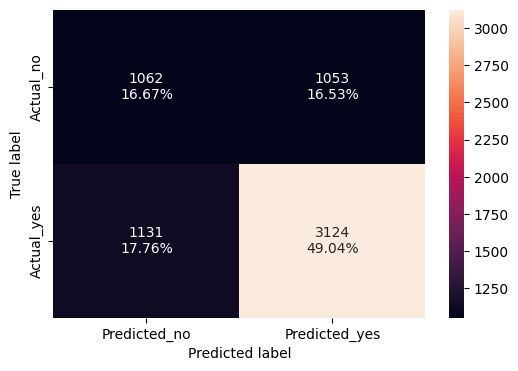

In [ ]:
 ## Complete the code to create confusion matrix for test data
 confusion_matrix_sklearn(model,X_test,y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model,X_test,y_test) ## Complete the code to check performance for test data
decision_tree_perf_test

#### **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.

In [ ]:
from sklearn import tree

tree.export_text(model,feature_names=X_train.columns.to_list())

"|--- education_of_employee_High School <= 0.50\n|   |--- unit_of_wage_Hour <= 0.50\n|   |   |--- has_job_experience_Y <= 0.50\n|   |   |   |--- continent_Europe <= 0.50\n|   |   |   |   |--- region_of_employment_Midwest <= 0.50\n|   |   |   |   |   |--- region_of_employment_South <= 0.50\n|   |   |   |   |   |   |--- education_of_employee_Bachelor's <= 0.50\n|   |   |   |   |   |   |   |--- full_time_position_N <= 0.50\n|   |   |   |   |   |   |   |   |--- education_of_employee_Doctorate <= 0.50\n|   |   |   |   |   |   |   |   |   |--- requires_job_training_N <= 0.50\n|   |   |   |   |   |   |   |   |   |   |--- prevailing_wage <= 25242.71\n|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3\n|   |   |   |   |   |   |   |   |   |   |--- prevailing_wage >  25242.71\n|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11\n|   |   |   |   |   |   |   |   |   |--- requires_job_training_N >  0.50\n|   |   |   |   |   |   |   |   |   |   |---

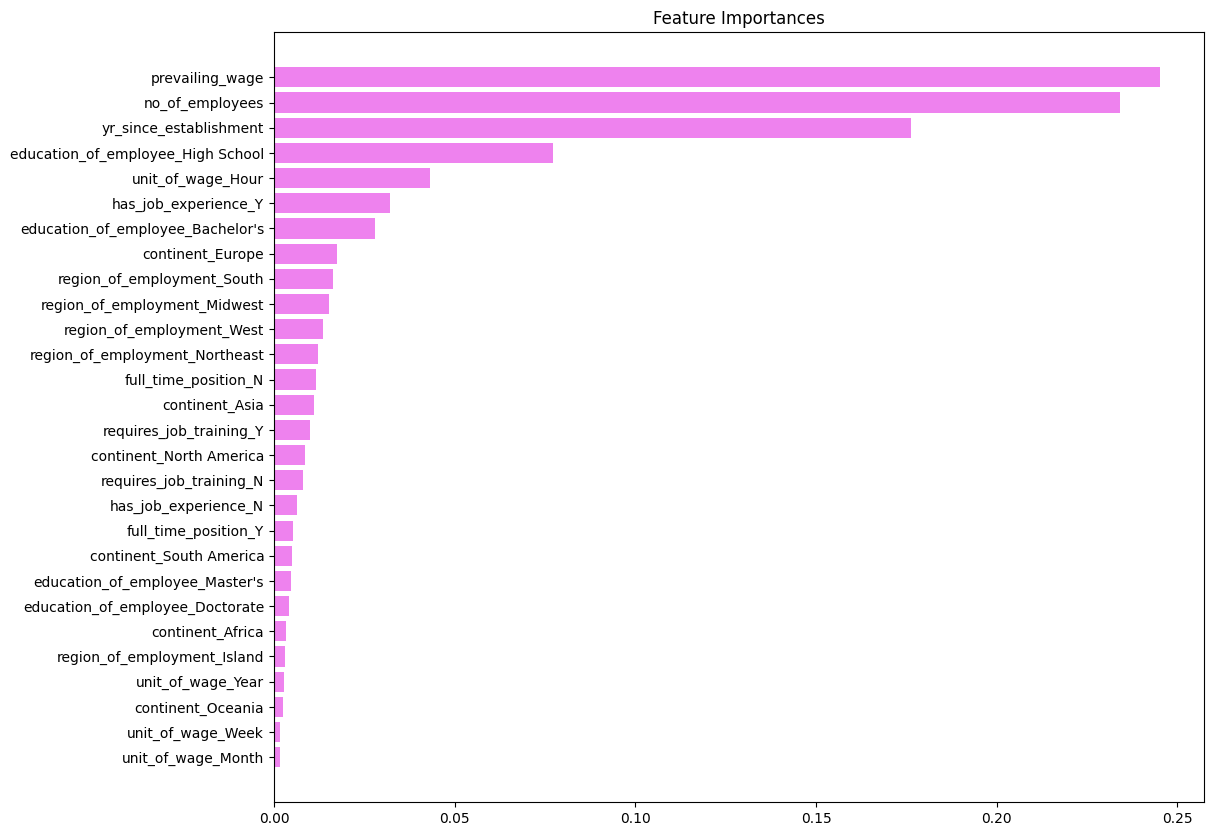

In [ ]:
features = X_train.columns
imp = model.feature_importances_
indices = np.argsort(imp)

plt.figure(figsize=(12,10))
plt.barh(range(len(indices)),imp[indices],color='violet',align='center')
plt.yticks(range(len(indices)),features[indices])
plt.title('Feature Importances')
plt.show()

In [ ]:
from sklearn import tree

plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dtree_estimator,
    feature_names=X_train.columns,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

NameError: name 'dtree_estimator' is not defined

<Figure size 2000x1000 with 0 Axes>

### Hyperparameter Tuning - Decision Tree

In [ ]:
tree.export_text(dtree_estimator,feature_names=X_train.columns.to_list())

In [ ]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 20, 5),
    "min_samples_leaf": [3, 5],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator,parameters,scoring=scorer,cv=5) ## Complete the code to run grid search with n_jobs = -1

grid_obj = grid_obj.fit(X_train,y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

In [ ]:
#round 1 tuned:
# Choose the type of classifier.
dtree_estimator2 = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(3, 10, 1),
    "min_samples_leaf": [3, 5],
    "max_leaf_nodes":  [5,7,9],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator2,parameters,scoring=scorer,cv=5) ## Complete the code to run grid search with n_jobs = -1

grid_obj = grid_obj.fit(X_train,y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
dtree_estimator2 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=9,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

In [ ]:
confusion_matrix_sklearn(dtree_estimator,X_train,y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [ ]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator,X_train,y_train) ## Complete the code to check performance for train data on tuned estimator
dtree_estimator_model_train_perf

In [ ]:
confusion_matrix_sklearn(dtree_estimator,X_test,y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [ ]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
dtree_estimator_model_test_perf

# Decision Tree - Hyper Tuning- Tuning round 1

In [ ]:
#checking performance metrics on testing
dtree_estimator1_model_train_perf = model_performance_classification_sklearn(dtree_estimator1,X_train,y_train) ## Complete the code to check performance for train data on tuned estimator
dtree_estimator1_model_train_perf

NameError: name 'dtree_estimator1' is not defined

In [ ]:
#checking performance metrics on training
dtree_estimator1_model_test_perf = model_performance_classification_sklearn(dtree_estimator1,X_test,y_test) ## Complete the code to check performance for train data on tuned estimator
dtree_estimator1_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727786,0.803525,0.791985,0.797713


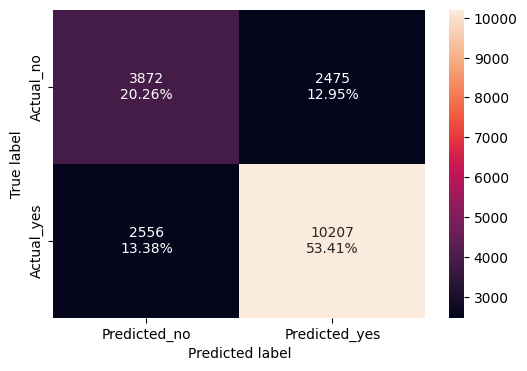

In [ ]:
confusion_matrix_sklearn(dtree_estimator1,X_train,y_train)

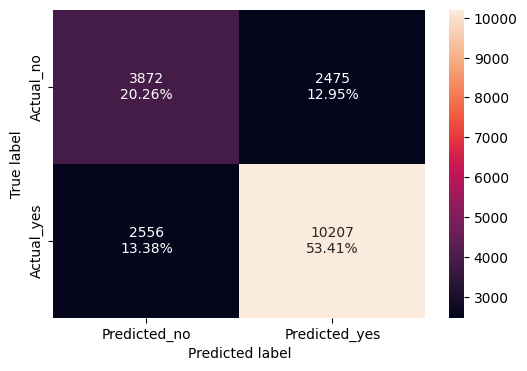

In [ ]:
confusion_matrix_sklearn(dtree_estimator1,X_train,y_train)



> # Decision Tree - Hyper Tuning- Tuning round 2



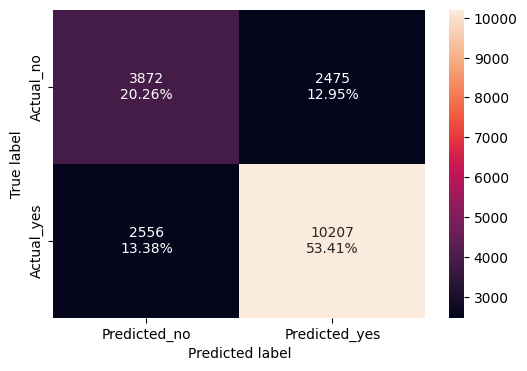

In [ ]:
confusion_matrix_sklearn(dtree_estimator2,X_train,y_train)

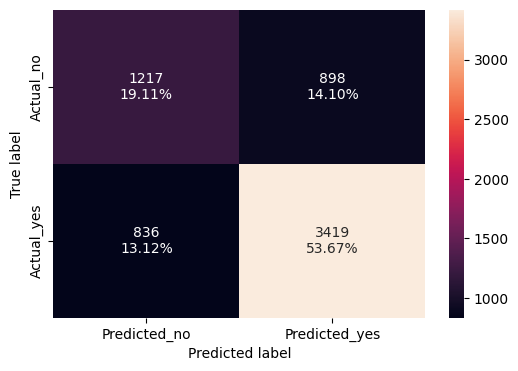

In [ ]:
confusion_matrix_sklearn(dtree_estimator2,X_test,y_test)

In [ ]:
dtree_tuned_train = model_performance_classification_sklearn(dtree_estimator2,X_train,y_train)
dtree_tuned_train

In [ ]:
dtree_tuned_test = model_performance_classification_sklearn(dtree_estimator2,X_test,y_test)
dtree_tuned_train

,Accuracy,Recall,Precision,F1
0,0.736735,0.799734,0.804842,0.802279


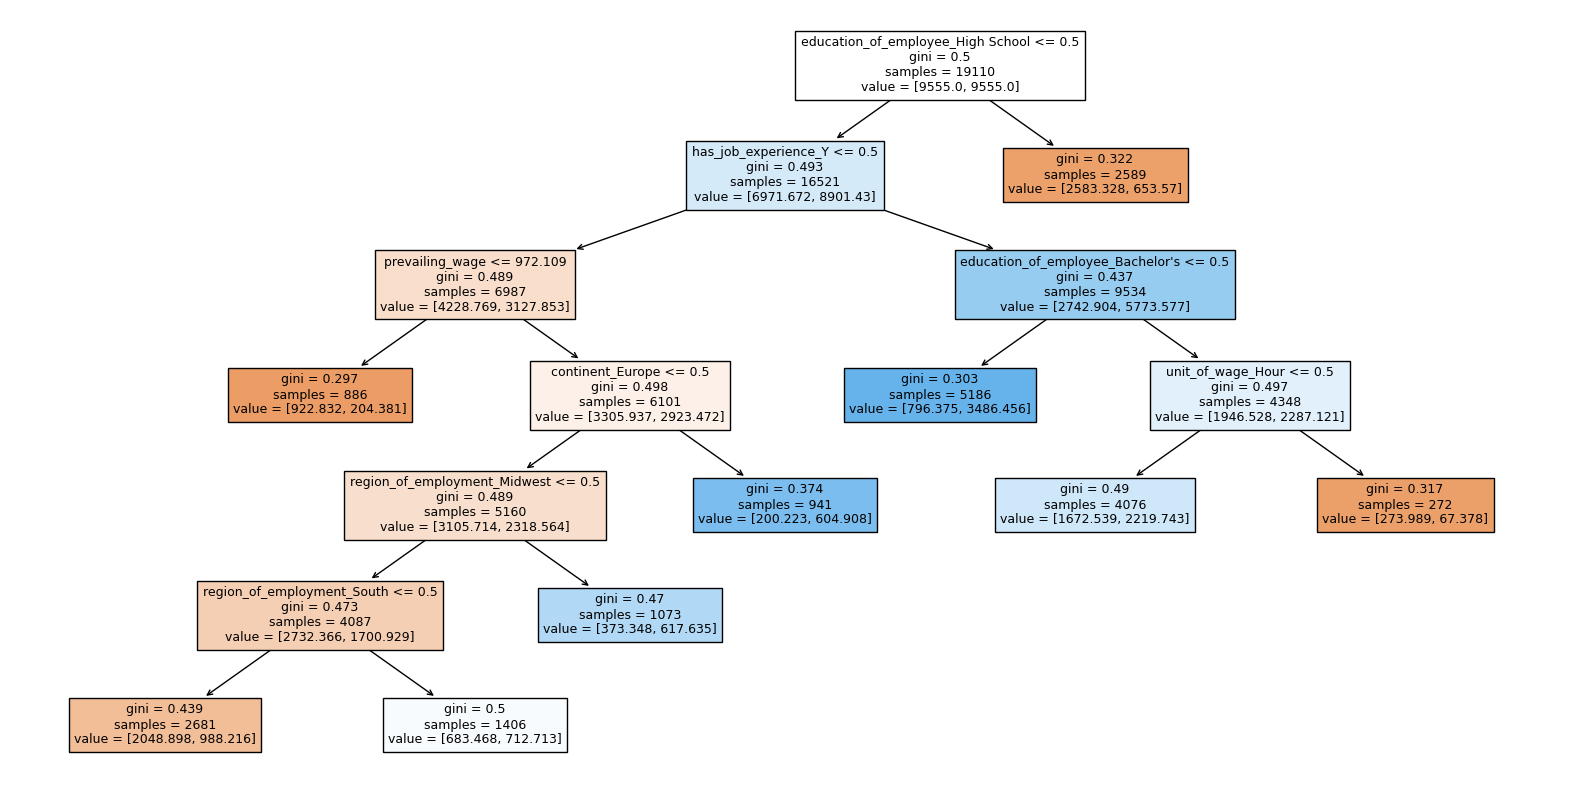

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,10))
out=tree.plot_tree(
    dtree_estimator2,
    feature_names = X_train.columns,
    filled=True,
    fontsize=9,
    class_names=None,
    node_ids=False
)
plt.show()

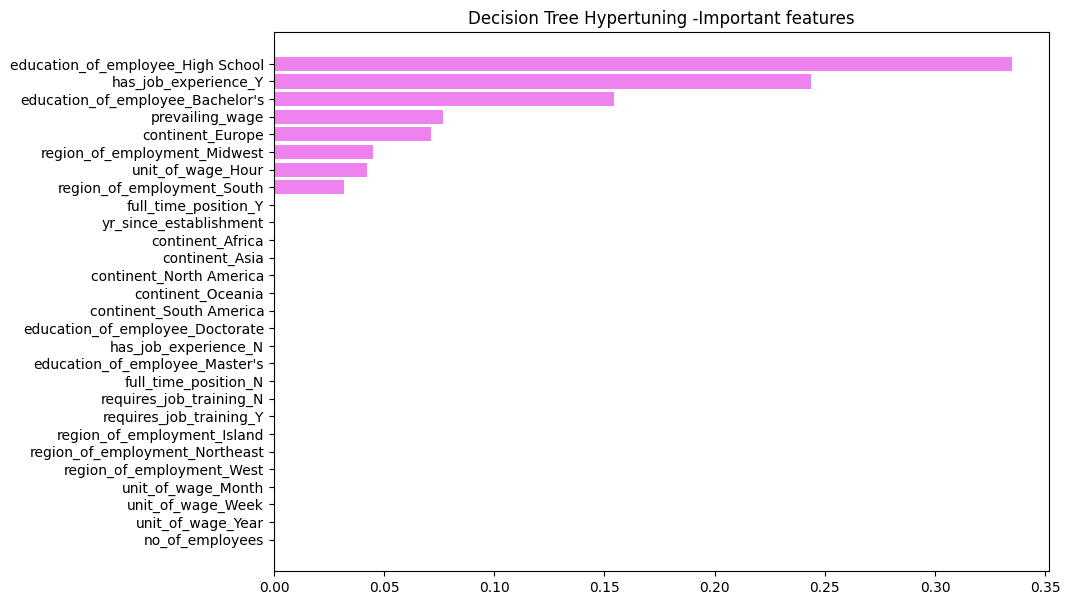

In [ ]:
imp = dtree_estimator2.feature_importances_
indices = np.argsort(imp)

plt.figure(figsize=(10,7))
plt.barh(range(len(indices)),imp[indices],align='center',color='violet')
plt.yticks(range(len(indices)),features[indices])
plt.title('Decision Tree Hypertuning -Important features')
plt.show()

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [ ]:
bagging_classifier = BaggingClassifier(random_state=1) ## Complete the code to define bagging classifier with random state = 1
bagging_classifier.fit(X_train,y_train) ## Complete the code to fit bagging classifier on the train data

BaggingClassifier(random_state=1)

#### Checking model performance on training set

In [ ]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier,X_train,y_train)## Complete the code to check performance on train data
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985453,0.98574,0.992427,0.989072


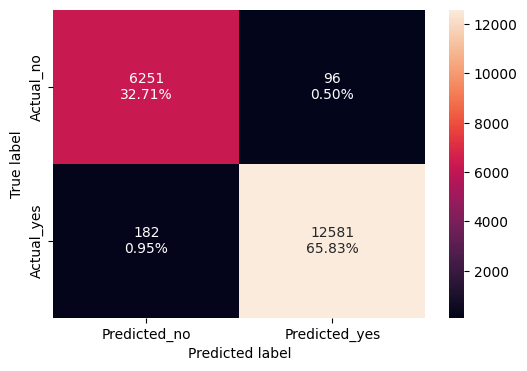

In [ ]:
confusion_matrix_sklearn(bagging_classifier,X_train,y_train)

#### Checking model performance on test set

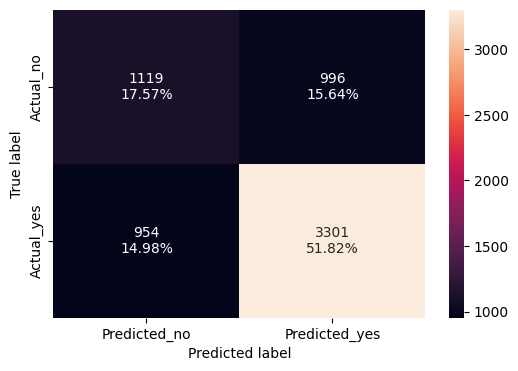

In [ ]:
confusion_matrix_sklearn(bagging_classifier,X_test,y_test) ## Complete the code to create confusion matrix for test data

In [ ]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier,X_test,y_test) ## Complete the code to check performance for test data
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.693878,0.775793,0.76821,0.771983


### Hyperparameter Tuning - Bagging Classifier

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5,0.7,1],
    "n_estimators": np.arange(50,110,25),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned,parameters,scoring=acc_scorer,cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train,y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

#### Checking model performance on training set

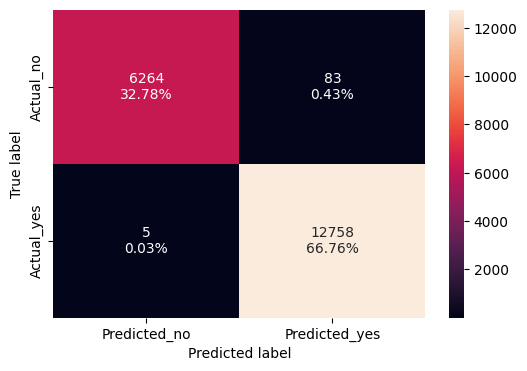

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned,X_train,y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [ ]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train) ## Complete the code to check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.995395,0.999608,0.993536,0.996563


#### Checking model performance on test set

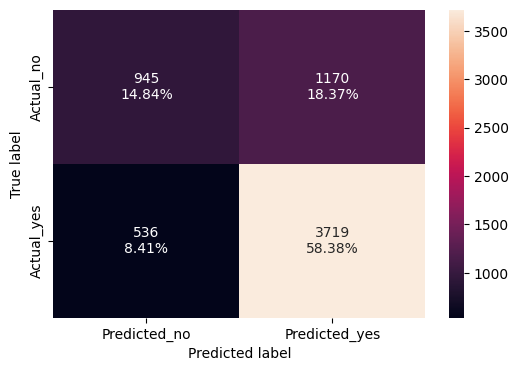

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [ ]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.732182,0.874031,0.760687,0.81343


### Random Forest

In [ ]:
# Fitting the model
rf_estimator = RandomForestClassifier(class_weight='balanced',random_state=1) ## Complete the code to define random forest with random state = 1 and class_weight = balanced
rf_estimator.fit(X_train,y_train) ## Complete the code to fit random forest on the train data

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

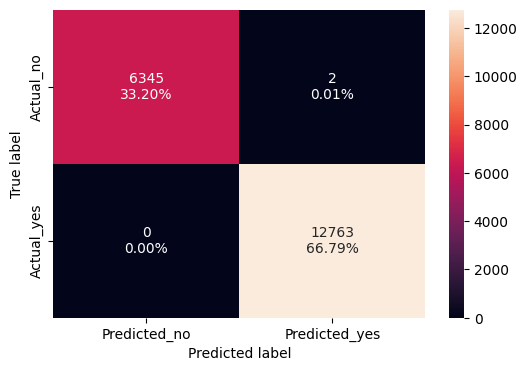

In [ ]:
confusion_matrix_sklearn(rf_estimator,X_train,y_train)## Complete the code to create confusion matrix for train data

In [ ]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator,X_train,y_train) ## Complete the code to check performance on train data
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999895,1.0,0.999843,0.999922


#### Checking model performance on test set

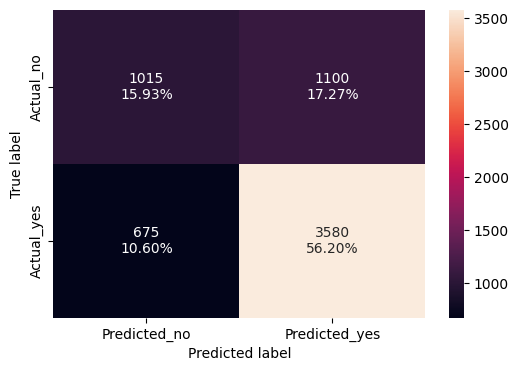

In [ ]:
confusion_matrix_sklearn(rf_estimator,X_test,y_test) ## Complete the code to create confusion matrix for test data

In [ ]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator,X_test,y_test) ## Complete the code to check performance for test data
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.72135,0.841363,0.764957,0.801343


### Hyperparameter Tuning - Random Forest

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned,parameters,scoring=acc_scorer,cv=5) ## Complete the code to run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(X_train,y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                       n_estimators=30, oob_score=True, random_state=1)

#### Checking model performance on training set

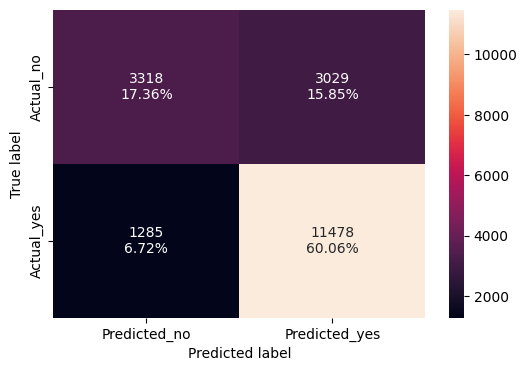

In [ ]:
 confusion_matrix_sklearn(rf_tuned,X_train,y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [ ]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned,X_train,y_train) ## Complete the code to check performance for train data on tuned estimator
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.774254,0.899318,0.791204,0.841804


#### Checking model performance on test set

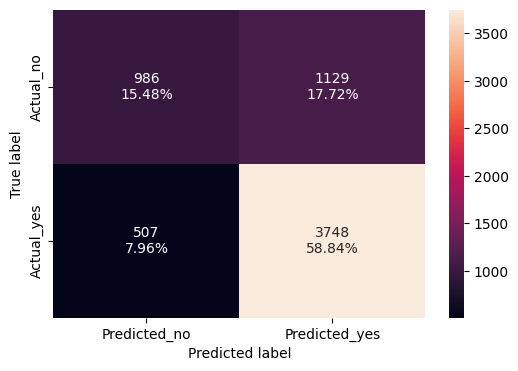

In [ ]:
confusion_matrix_sklearn(rf_tuned,X_test,y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [ ]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743171,0.880846,0.768505,0.82085


## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [ ]:
ab_classifier = AdaBoostClassifier(random_state=1) ## Complete the code to define AdaBoost Classifier with random state = 1
ab_classifier.fit(X_train,y_train) ## Complete the code to fit AdaBoost Classifier on the train data

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

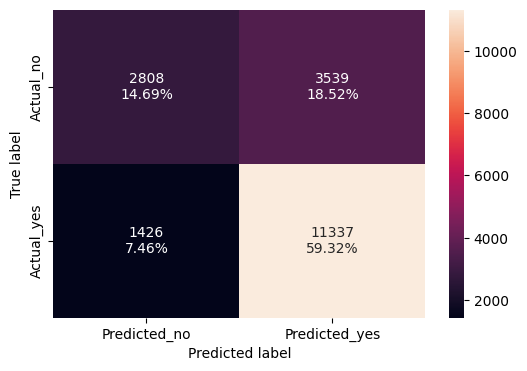

In [ ]:
confusion_matrix_sklearn(ab_classifier,X_train,y_train) ## Complete the code to create confusion matrix for train data

In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train) ## Complete the code to check performance on train data
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.740188,0.888271,0.7621,0.820363


#### Checking model performance on test set

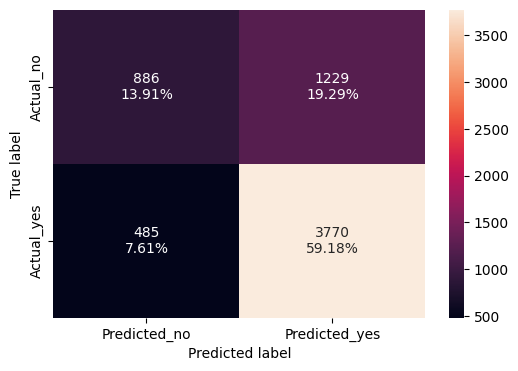

In [ ]:
confusion_matrix_sklearn(ab_classifier,X_test,y_test) ## Complete the code to create confusion matrix for test data

In [ ]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test) ## Complete the code to check performance for test data
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.730926,0.886016,0.754151,0.814783


##Tuning Ada Boost



In [ ]:
ad_boost_tuned= AdaBoostClassifier(random_state=1)
ad_boost_tuned.fit(X_train,y_train)

parameters = {
              #"base_estimator":[DecisionTreeClassifier(max_depth=random_state=1)],
              'n_estimators': np.arange(50,150,25),
              'learning_rate':np.arange(0.01,0.1,0.05)
              }

acc_scorer = metrics.make_scorer(f1_score)
grid_obj = GridSearchCV(ad_boost_tuned,parameters,scoring=acc_scorer,cv=5)
grid_obj.fit(X_train,y_train)

ad_boost_tuned=grid_obj.best_estimator_
ad_boost_tuned.fit(X_train,y_train)



AdaBoostClassifier(learning_rate=0.060000000000000005, n_estimators=125,
                   random_state=1)

In [ ]:
model_performance_classification_sklearn(ad_boost_tuned,X_train,y_train)

,Accuracy,Recall,Precision,F1
0,0.723129,0.930972,0.729315,0.817897


In [ ]:
model_performance_classification_sklearn(ad_boost_tuned,X_test,y_test)

,Accuracy,Recall,Precision,F1
0,0.714286,0.92832,0.722781,0.812757


### Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2,random_state=1),
        DecisionTreeClassifier(max_depth=3,random_state=1),
    ],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": np.arange(0.01,0.1,0.05),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned,parameters,scoring=acc_scorer,cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train,y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.060000000000000005, n_estimators=75,
                   random_state=1)

#### Checking model performance on training set

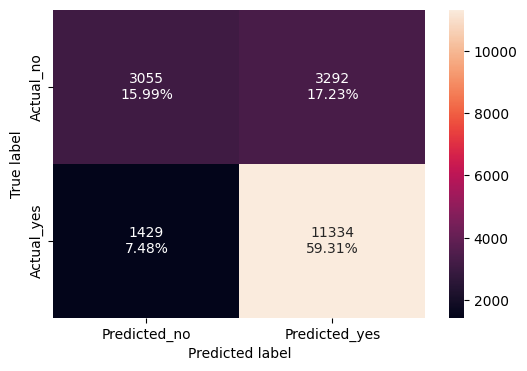

In [ ]:
confusion_matrix_sklearn(abc_tuned,X_train,y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [ ]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train) ## Complete the code to check performance for train data on tuned estimator
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.752957,0.888036,0.774921,0.827632


#### Checking model performance on test set

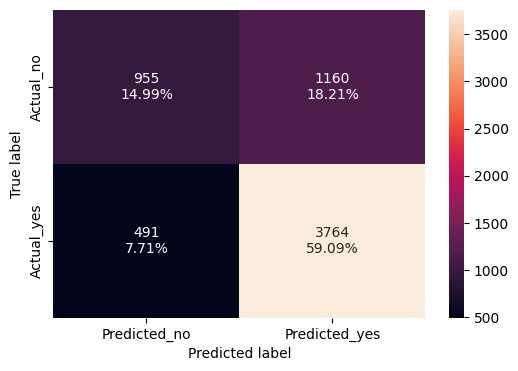

In [ ]:
confusion_matrix_sklearn(abc_tuned,X_test,y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [ ]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.740816,0.884606,0.764419,0.820133


### Gradient Boosting Classifier

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=1) ## Complete the code to define Gradient Boosting Classifier with random state = 1
gb_classifier.fit(X_train,y_train) ## Complete the code to fit Gradient Boosting Classifier on the train data

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

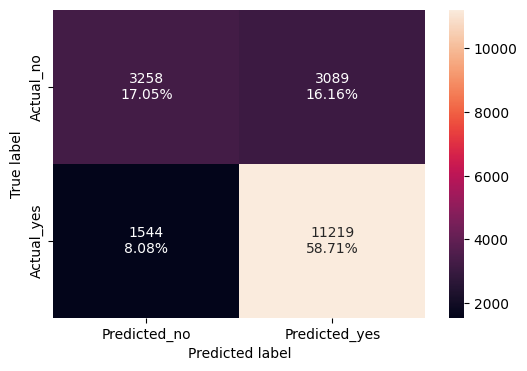

In [ ]:
confusion_matrix_sklearn(gb_classifier,X_train,y_train)## Complete the code to create confusion matrix for train data

In [ ]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train,y_train) ## Complete the code to check performance on train data
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.757561,0.879025,0.784107,0.828857


#### Checking model performance on test set

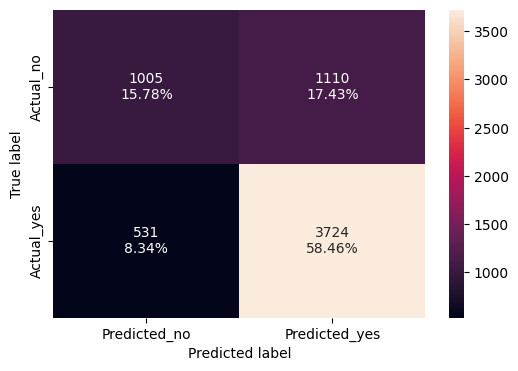

In [ ]:
 confusion_matrix_sklearn(gb_classifier,X_test,y_test) ## Complete the code to create confusion matrix for test data

In [ ]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test) ## Complete the code to check performance for test data
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742386,0.875206,0.770376,0.819452


### Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.7,0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned,parameters,scoring=acc_scorer,cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train,y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.8, random_state=1,
                           subsample=0.9)

#### Checking model performance on training set

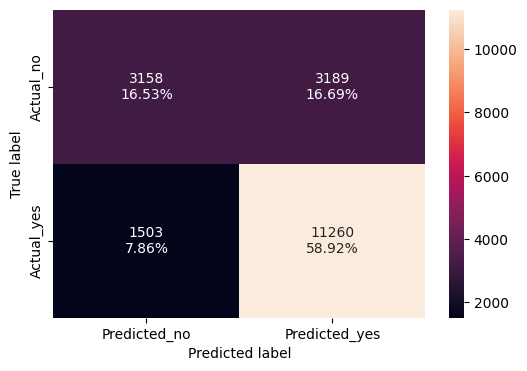

In [ ]:
confusion_matrix_sklearn(gbc_tuned,X_train,y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [ ]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train) ## Complete the code to check performance for train data on tuned estimator
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.754474,0.882238,0.779293,0.827576


#### Checking model performance on test set

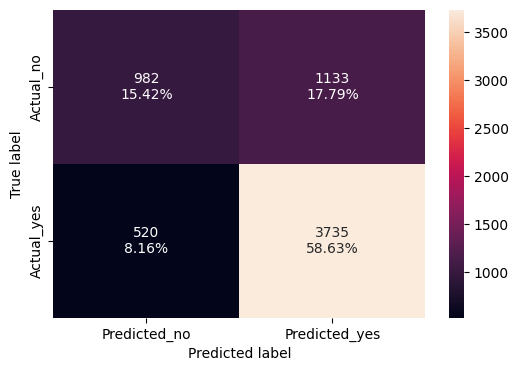

In [ ]:
confusion_matrix_sklearn(gbc_tuned,X_test,y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [ ]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.740502,0.877791,0.767256,0.81881


### Note - You can choose **not to build** XGBoost if you have any installation issues

### XGBoost Classifier

In [ ]:
xgb_classifier = XGBClassifier(random_state = 1,eval_metric="logloss") ## Complete the code to define XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb_classifier.fit(X_train,y_train) ## Complete the code to fit XGBoost Classifier on the train data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Checking model performance on training set

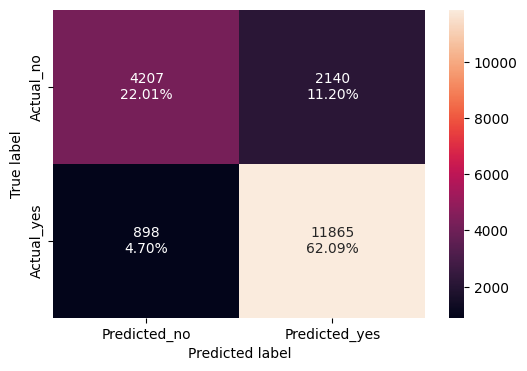

In [ ]:
confusion_matrix_sklearn(xgb_classifier,X_train,y_train) ## Complete the code to create confusion matrix for train data

In [ ]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier,X_train,y_train) ## Complete the code to check performance on train data
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.841026,0.92964,0.847197,0.886506


#### Checking model performance on test set

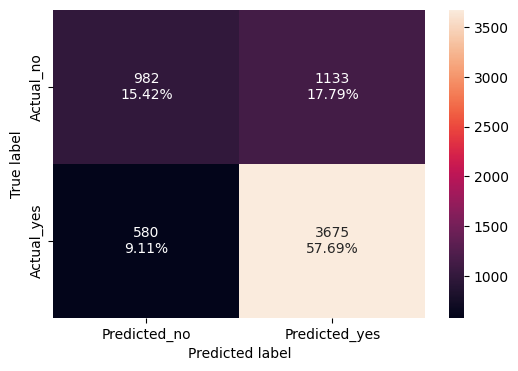

In [ ]:
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)## Complete the code to create confusion matrix for test data

In [ ]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier,X_test,y_test) ## Complete the code to check performance for test data
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.731083,0.86369,0.764351,0.81099


### Hyperparameter Tuning - XGBoost Classifier

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
    "gamma": [1,3]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned,parameters,) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train,y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Checking model performance on training set

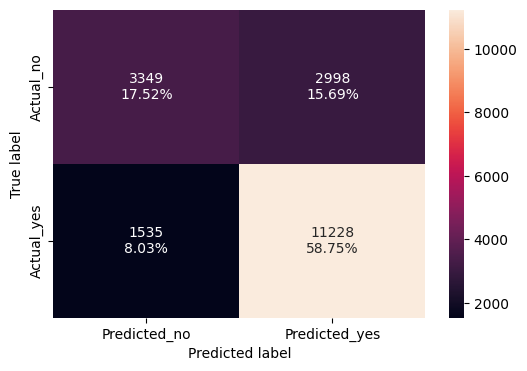

In [ ]:
confusion_matrix_sklearn(xgb_tuned,X_train,y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [ ]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train) ## Complete the code to check performance for train data on tuned estimator
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.762794,0.87973,0.789259,0.832043


#### Checking model performance on test set

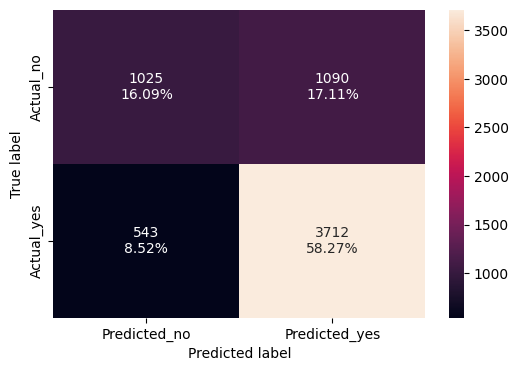

In [ ]:
confusion_matrix_sklearn(xgb_tuned,X_test,y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [ ]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train) ## Complete the code to check performance for test data on tuned estimator
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.762794,0.87973,0.789259,0.832043


## Stacking Classifier

In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier =  StackingClassifier(estimators,final_estimator)## Complete the code to define Stacking Classifier

stacking_classifier.fit(X_train,y_train) ## Complete the code to fit Stacking Classifier on the train data

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='log2',
                                                       min_samples_split=5,
                                                       n_estimators=30,
                                                       oob_score=True,
                                                       random_state=1))],
                   final_estimator=XGBClassif...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=75, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

### Checking model performance on training set

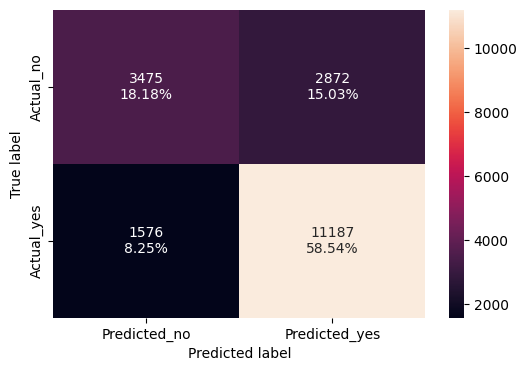

In [ ]:
confusion_matrix_sklearn(stacking_classifier,X_train,y_train) ## Complete the code to create confusion matrix for train data

In [ ]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier,X_train,y_train) ## Complete the code to check performance on train data
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.767242,0.876518,0.795718,0.834166


### Checking model performance on test set

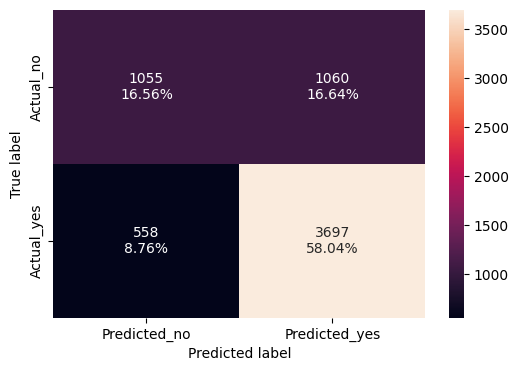

In [ ]:
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)## Complete the code to create confusion matrix for test data

In [ ]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier,X_test,y_test) ## Complete the code to check performance for test data
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.745997,0.86886,0.77717,0.820462


## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_tuned_train.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.736735,0.985453,0.995395,0.999895,0.774254,0.740188,0.752957,0.757561,0.754474,0.841026,0.762794,0.767242
Recall,1.0,0.799734,0.985740,0.999608,1.000000,0.899318,0.888271,0.888036,0.879025,0.882238,0.929640,0.879730,0.876518
Precision,1.0,0.804842,0.992427,0.993536,0.999843,0.791204,0.762100,0.774921,0.784107,0.779293,0.847197,0.789259,0.795718
F1,1.0,0.802279,0.989072,0.996563,0.999922,0.841804,0.820363,0.827632,0.828857,0.827576,0.886506,0.832043,0.834166


In [ ]:
# testing performance comparison
model_perf_test_df = pd.concat(
        [
        lg_test.T,
        decision_tree_perf_test.T,
        dtree_tuned_train.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T
        ],
        axis=1
)
model_perf_test_df.columns = [
    'Logistic_reg'
    'Decision Tree Classifier',
    'Tuned Decision Tree classifier',
    'Bagging Classifier',
    'Tuned Bagging Classifier',
    'Random Forest Classifier',
    'Tuned Random Forest Classifier',
    'Ada Boost Classifier',
    'Tuned Ada Boost Classifier',
    'Gradient Boost Calssifier',
    'Tuned Gradient Classifier',
    'Xgboost Classifier',
    'Xgboost tuned Classifier',
    'Stacking class classifier'
]

## Complete the code to check performance for test data
print('Model performance ')
model_perf_test_df

NameError: name 'decision_tree_perf_test' is not defined

### Important features of the final model

In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

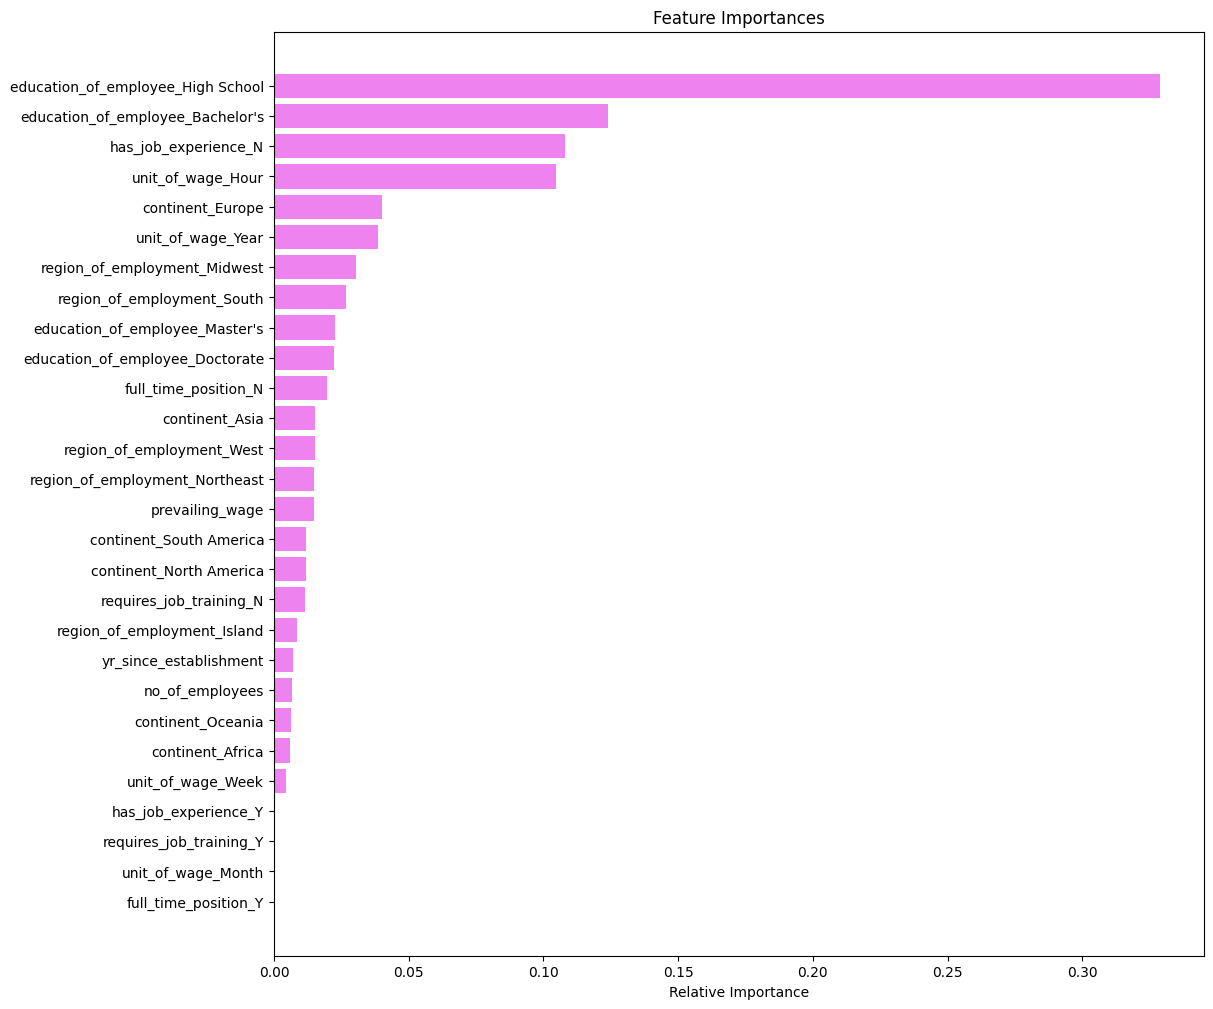

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
feature_names = X_train.columns
importances = stacking_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

AttributeError: 'StackingClassifier' object has no attribute 'feature_importances_'

## Business Insights and Recommendations

-


___

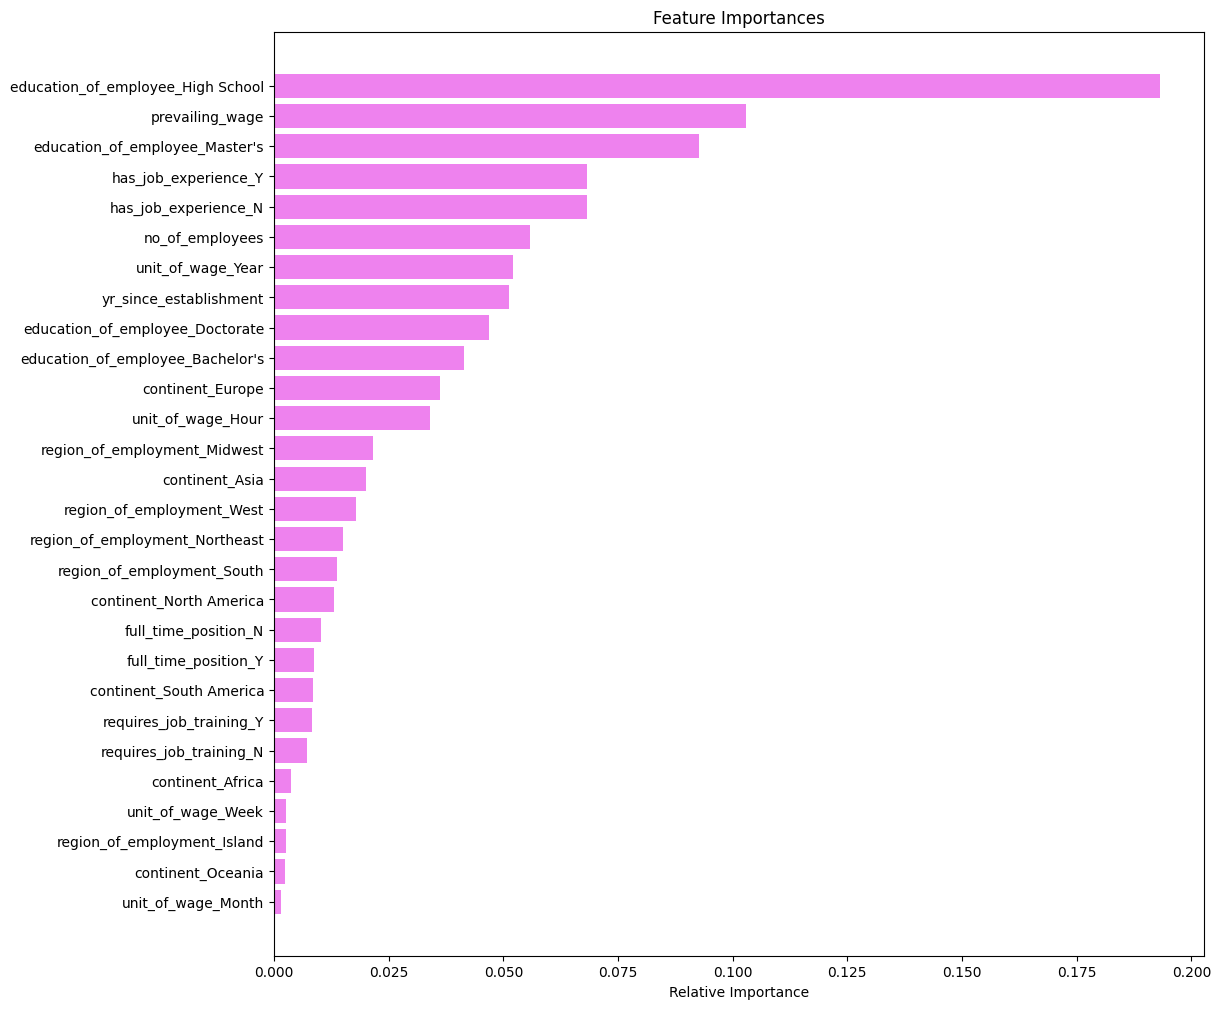

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()